In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from collections import OrderedDict
from PIL import Image

In [11]:
#To display all operations from the cell

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# Getting path to data

In [22]:
main = Path('../archive')
part1 = main/'ADS16_Benchmark_part1'/'ADS16_Benchmark_part1'
part2 = main/'ADS16_Benchmark_part2'/'ADS16_Benchmark_part2'

ads_p1 = part1/'Ads'/'Ads'
ads_p2 = part2/'Ads'/"Ads"
corpus_p1 = part1/'Corpus'/'Corpus'
corpus_p2 = part2/'Corpus'/'Corpus'

ads_l = sorted([f for f in Path(ads_p1).iterdir()]+[f for f in Path(ads_p2).iterdir()])
corpus_l = sorted([f for f in Path(corpus_p1).iterdir()]+[f for f in Path(corpus_p2).iterdir()])

print(corpus_l)

[WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0001'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0002'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0003'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0004'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0005'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0006'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0007'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0008'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0009'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0010'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0011')

In [19]:
print('Content of \Ads directory:')
ads_l

Content of \Ads directory:


[WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/10'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/2'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/3'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/4'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/5'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/6'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/7'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/8'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/9'),
 WindowsPath('../archive/ADS16_Benchmark_part2/ADS16_Benchmark_part2/Ads/Ads/11'),
 WindowsPath('../archive/ADS16_Benchmark_part2/ADS16_Benchmark_part2/Ads/Ads/12'),
 WindowsPath(

In [23]:
print('Content of Corpus directory')
corpus_l

Content of Corpus directory


[WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0001'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0002'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0003'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0004'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0005'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0006'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0007'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0008'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0009'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corpus/U0010'),
 WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Corpus/Corp

# Pull data content from directories

In [24]:
#showing list of directories for first folder
sample_ad = ads_l[0]
sample_corpus = corpus_l[0]
print("Content of sample in \Ads folder:")
sample_ad_ls = []
for f in sample_ad.iterdir():
    sample_ad_ls.append(f)
print(sample_ad_ls)

sample_corpus_ls = []
for f in sample_corpus.iterdir():
    sample_corpus_ls.append(f)
print(sample_corpus_ls)


Content of sample in \Ads folder:
[WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/1.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/10.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/11.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/12.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/13.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/14.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/15.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/16.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/2.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/3.png'), WindowsPath('../archive/ADS16_Benchmark_part1/ADS16_Benchmark_part1/Ads/Ads/1/4.png'), W

In [30]:
for path in sample_corpus_ls:
    if path.suffix == ".csv":
        
        df_temp = pd.read_csv(path, sep=";", header=[0])
        print (f"\n Printing some contents of {path.name}: \n")
        df_temp.head(25)



 Printing some contents of U0001-B5.csv: 



,Question#,Answer
0,1,1
1,2,2
2,3,-2
3,4,0
4,5,-1
5,6,0
6,7,-2
7,8,2
8,9,-1
9,10,1



 Printing some contents of U0001-IM-NEG.csv: 



,unfave1,unfave2,unfave3,unfave4,unfave5
0,U0001-IM-NEG/1.png,U0001-IM-NEG/2.png,U0001-IM-NEG/3.png,U0001-IM-NEG/4.png,U0001-IM-NEG/5.png
1,news headlines,homelessness,violence,war,human rights



 Printing some contents of U0001-IM-POS.csv: 



,fave1,fave2,fave3,fave4,fave5
0,U0001-IM-POS/1.png,U0001-IM-POS/2.png,U0001-IM-POS/3.png,U0001-IM-POS/4.png,U0001-IM-POS/5.png
1,my cats,my cats,movie we are in,tv show we are in,movie we are in



 Printing some contents of U0001-INF.csv: 



,Name,Last Name,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Home town,Cap/Zip-Code,Timepass,Countries visited,Fave Sports
0,Hidden,Hidden,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Apollo,15613,Internet,United States of America,I do not like Sports



 Printing some contents of U0001-PREF.csv: 



,Most visited websites,Most listened musics,Most watched movies,Most watched tv programmes,Most read books
0,"Media (Books, DVD, CD/DVD Music) sites, Grocer...","Classical Music, Easy Listening, Jazz","Action, Thriller, Drama, Comedy, Mystery","Comedy, Drama",Mystery



 Printing some contents of U0001-RT.csv: 



,Cat0,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,Cat13,Cat14,Cat15,Cat16,Cat17,Cat18,Cat19
0,Clothing & Shoes,Automotive,Baby Products,Health & Beauty,Media (BMVD),Consumer Electronics,Console & Video Games,DIY & Tools,Garden & Outdoor living,Grocery,Kitchen & Home,Betting,Jewellery & Watches,Musical Instruments,Office Products,Pet Supplies,Computer Software,Sports & Outdoors,Toys & Games,Dating Sites
1,"1,1,1,1,1,3,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2,1,1,1,3,1,1,1,1,1,1,1,1,1,1","1,1,1,3,1,1,1,1,1,1,1,2,2,2,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,2,1,1,1,3,1,1,1,1,1,1,1,1,3","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,2,1,1,1,1,1,1,1,1,1,1,1,1","1,2,1,2,1,1,1,3,1,1,3,1,1,1,1","1,1,2,1,1,1,1,1,1,1,1,2,2,1,2","1,1,1,1,1,1,1,1,1,1,1,3,1,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,3,1,2,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,1,3,1,1,1,1","1,3,4,1,2,1,1,1,1,1,1,1,1,2,3","3,2,3,3,2,1,1,2,1,1,1,2,1,2,3","1,1,1,1,1,1,1,1,1,1,1,2,1,1,1","2,1,1,1,1,1,1,3,1,1,1,1,2,1,1","1,3,1,3,2,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"


# Check Ads 

In [95]:
def image_grid(image_l, im_height, im_width, n_rows, n_cols):
    
    cnt = 0
    
    #Define grid dimensions
    grid_height = im_height * n_rows
    grid_width = im_width * n_cols
    
    #Define figure size dimensions
    fig_height = int(5 * n_rows)
    fig_width = int(5 * n_cols)
    
    #Create a new image canvas
    comp_img = Image.new('RGB', (grid_width, grid_height))
    
    for i in range(0, grid_width, im_width):
    
        for j in range(0, grid_height, im_height):
        
            #Load the image and resize dimensions
            im = Image.open(image_l[cnt])
            im.thumbnail((im_height, im_width))
            
            #Paste it the new image canvas
            comp_img.paste(im, (i, j))        
            
            #Increment counter
            cnt += 1
    
    #Display the canvas
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.imshow(np.asarray(comp_img))
    
   

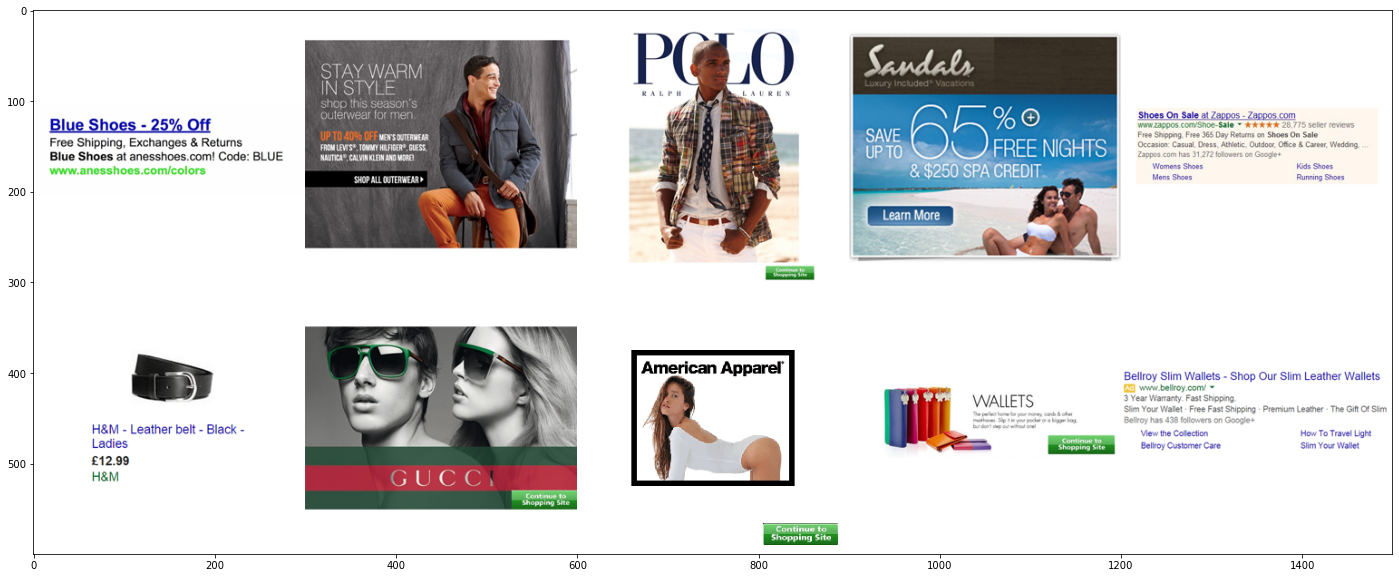

In [96]:
#Print a grid of images

image_grid(image_l = sample_ad_ls, im_height = 300, im_width = 300, n_rows = 2, n_cols = 5)

# Content of full dataset

1. There are 20 Ad categories —> 300 Ads and 120 Users in total.
2. Each Ad Category folder contains a collection of 15 image files. Paths to these 20 folders are contained in `ads_l` in the notebook. An Ad Category is considered to be "clicked" if it contains an advert that is "clicked" (Refer Point 9)
3. 300 Ads —> 100 Rich Media Ads, 100 Image Ads and 100 Text Ads.
3. Each User folder (for e.g. U0001) contains 6 CSV files and 2 folders. Path to each user are contained in `corpus_l`
4. (CSV #1) U0001-INF.csv (14 cols, 1 row) contains personal information (e.g. Gender, Age, Income...).
5. (CSV #2) U0001-PREF.csv (5 cols, 1 row) contains preferences (e.g. Most visited websites, most read books...). Each field is a CSV of categories (e.g. Comedy, Horror, Mystery...)
6. (CSV #3) U0001-B5.csv (3 cols, 10 rows) contains answers to Big Five Inventory-10 personality test.
7. (CSV #4 & #5) Both U0001-IM-POS.csv & U0001-IM-NEG.csv(5 cols, 2 rows each) refer to the contents of the respective folders and user reactions (e.g. "my cats" for an image in POS and "violence" for an image in NEG) to the same.
8. (CSV #6) U0001-RT.csv (20 cols, 2 rows) contains user rating FOR each ad in each ad category along a Likert Scale ranging from +1 to +5. +4 and +5 corresponds to a "click" in the paper.


# Collecting fuctions

Each function corresponds to a particular CSV file in a User Folder.

For a given user, they accept dataframes and return Panda Series, that will be later merged into a dataframe with all data collected

In [55]:
#For CSV#1 and #2 _ Inf, Pref:

def df_to_series(df):
    temp = df.copy()
    inf_series = temp.squeeze(0)
    return inf_series
    

In [61]:
# For CSV #3 _ B5 cracking the personality results


def b5_df_to_ocean_series(df_b5):
    
    """
    Accepts a dataframe and returns a processed Pandas Series of Big Five Scores.
    
    Scoring the BFI-10 scales:
    Extraversion: 1R, 6; Agreeableness: 2, 7R; Conscientiousness: 3R, 8; Neuroticism: 4R, 9;
    Openness: 5R; 10 (R item is reversed-scored)
    """  
    temp = df_b5.copy()
    
    #Drop column: Question#
    temp.drop(columns = ['Question#'], axis = 1, inplace = True)
    
    #Scale dataframe from range -2->2 to 1->5
    temp ++ 3
    
    #Set the mask for converting reverse scores 1R, 3R, 4R, 5R, 7R
    reverse_mask = [0, 2, 3, 4, 6]
    temp.iloc[reverse_mask, :] = 6 - temp.iloc[reverse_mask, :]
    
    #create a dictionary for the different scores
    idx_dict = {
        "E_score" : [0, 5],
        "A_score" : [1, 6],
        "C_score" : [2, 7],
        "N_score" : [3, 8],
        "O_score" : [4, 9],
    }
    
    #Create another dictionary with sum of scores to be included as Series in the dataframe
    
    scores_dict = {col: temp.iloc[row_l, :].squeeze(1).sum() for col, row_l in idx_dict.items()}
    ocean_series = pd.Series(scores_dict)
    
    return ocean_series

In [74]:
#For CSV #6 _ RT on advertisements

def rt_df_to_series(df_rt):
    temp = df_rt.copy()
    
    #dropping first row of categories
    temp.drop(index=[0], inplace = True)
    
    #creating column names including category and ad number
    col_names = temp.columns.tolist()
    for cat_num, cat in enumerate(col_names): #cat_num = enumaration and cat = category
        list_responses = temp[cat].str.split(",").loc[1]  #1 because 0 index was deleted
        for ad_num, response in enumerate(list_responses): #ad_num = enumaration of ad, response is the ratinf data
            new_col_name = 'Cat' + str(cat_num + 1) + "_" + str(ad_num + 1) # new column name using enumaration
            temp.loc[1, new_col_name] = response
    
    #Drop the old columns        
    temp.drop(columns=col_names, inplace=True)
    rt_series = pd.to_numeric(temp.squeeze())
    
    return rt_series

    
    


# Adding all series to one final dataframe

In [93]:
df = pd.DataFrame()

for corpus in corpus_l:
    
    #Create ordered dictionary for result
    result_d = OrderedDict()
    
    #create loop to add all data from different files
    for file_path in corpus.iterdir():
        if file_path.suffix == ".csv":
            df_temp = pd.read_csv(file_path, sep=";", header=[0])
            print(f"\n [INFO] Working on file {file_path.stem}: \n")
            if ("INF" in file_path.name) or ("PREF" in file_path.name):
                result = df_to_series(df_temp)
            elif "B5" in file_path.name:
                result = b5_df_to_ocean_series(df_temp)
            elif "RT" in file_path.name:
                result = rt_df_to_series(df_temp)
            else:
                print(f"{file_path.name} not relevant for this work")
            result.to_dict(OrderedDict)
            result_d.update(result)
        
            
    df_temp = pd.DataFrame(result_d, columns=result_d.keys(), index=[0])
    df = df.append(df_temp, ignore_index=True)
    
    
    

OrderedDict([('E_score', 5),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 5),
             ('O_score', 8)])

U0001-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 5),
             ('O_score', 8)])

U0001-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 5),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 62),
             ('Paypal', 'hidden@comcast.net'),
             ('Type of Job', 'Housewife/Househusband'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Apollo'),
             ('Cap/Zip-Code', 15613),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Grocery &amp; beverages sites, Pet supplies sites'),
             ('Most listened musics', 'Classical Music, Easy Listening, Jazz'),
             ('Most watched movies',
              'Action, Thriller, Drama, Comedy, Mystery'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books', 'Mystery')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 3),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 3),
             ('A_score', 4),
             ('C_score', 4),
             ('N_score', 10),
             ('O_score', 8)])

U0002-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 4),
             ('C_score', 4),
             ('N_score', 10),
             ('O_score', 8)])

U0002-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 4),
             ('C_score', 4),
             ('N_score', 10),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 26),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Chicago'),
             ('Cap/Zip-Code', 60638),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Poland, Mexico, United States of America'),
             ('Fave Sports', 'Nothing')])

OrderedDict([('Most visited websites',
              'Toys &amp; games sites, Console &amp; video games sites'),
             ('Most listened musics',
              'Dance Music, Electronic Music, Indie Pop, Pop (Popular music), Rock'),
             ('Most watched movies', 'Drama'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books',
              'Romance, Mystery, Science fiction, Science')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 8)])

U0003-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 8)])

U0003-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 22),
             ('Paypal', 'hidden@uwosh.edu'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Greenville'),
             ('Cap/Zip-Code', 54942),
             ('Timepass', 'Sports'),
             ('Countries visited', 'France'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Sports &amp; outdoor sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics',
              'Hip Hop - Rap, Dance Music, Electronic Music, Rock'),
             ('Most watched movies', 'Comedy, Documentary'),
             ('Most watched tv programmes', 'Sport, News'),
             ('Most read books', 'Biographies')])

OrderedDict([('Cat1_1', 4),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 5),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 4),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 4),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 3),
             ('Cat2_4', 4),
             ('Cat2_5', 3),
             ('Cat2_6', 4),
             ('Cat2_7', 3),
             ('Cat2_8', 5),
             ('Cat2_9', 2),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 4),
             ('Cat2_13', 5),
             ('Cat2_14', 4),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

U0004-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

U0004-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 24),
             ('Paypal', 'hidden@hotmail.co.uk'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'Great Britain'),
             ('Home town', 'London'),
             ('Cap/Zip-Code', 'NW1 1EU'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'United States of America, United Kingdom, Italy, Germany, France, Spain, Netherlands (Holland, Europe), Mexico, Aruba, Bermuda, Portugal'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Stationery &amp; office supplies sites, Clothing &amp; shoes sites, Health &amp; Beauty sites, Home stuffs sites'),
             ('Most listened musics',
              'Alternative Music, Pop (Popular music), Rock'),
             ('Most watched movies',
              'Comedy, Action, Drama, Animation, Musical, Family, Sci-Fi, Adventure'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books',
              'Science fiction, Satire, Trilogies, Series')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 4),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 5),
             ('O_score', 9)])

U0005-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 5),
             ('O_score', 9)])

U0005-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 5),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 34),
             ('Paypal', 'hidden@email.cz'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'Czech Republic'),
             ('Home town', 'Prague'),
             ('Cap/Zip-Code', 10000),
             ('Timepass', 'Sports'),
             ('Countries visited',
              'Russia, Slovakia, Slovenia, China, India, France, Hungary, Italy, Great Britain, Ukraine'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Consumer electronics sites, Clothing &amp; shoes sites, Outdoor Living sites, Home stuffs sites, Jewellery &amp; watches sites, Computer software sites, Sports &amp; outdoor sites'),
             ('Most listened musics',
              'Electronic Music, Asian Pop (J-Pop or K-pop), Rock'),
             ('Most watched movies',
              'Sci-Fi, Adventure, Thriller, Action, Crime and Gangster, Epic - Historical, Animation, Mystery, Documentary, Fantasy, Horror'),
             ('Most watched tv programmes', 'Learning, Weather'),
             ('Most read books',
              'Science fiction, Action and Adventure, Mystery, Horror, Travel, Science, Journals, Fantasy')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 3),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 4),
             ('Cat1_9', 4),
             ('Cat1_10', 4),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 2),
             ('Cat2_5', 1),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

U0006-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

U0006-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 38),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Housewife/Househusband'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Chicago'),
             ('Cap/Zip-Code', 60628),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Tahiti'),
             ('Fave Sports', 'Precision sports\u200e (Golf, Bowling, ...)')])

OrderedDict([('Most visited websites', 'Clothing &amp; shoes sites'),
             ('Most listened musics', 'Easy Listening, Dance Music'),
             ('Most watched movies', 'Adventure'),
             ('Most watched tv programmes', 'Entertainment (Variety Shows)'),
             ('Most read books', 'Romance')])

OrderedDict([('Cat1_1', 5),
             ('Cat1_2', 5),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 2),
             ('Cat1_7', 5),
             ('Cat1_8', 3),
             ('Cat1_9', 5),
             ('Cat1_10', 5),
             ('Cat1_11', 5),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 1),
             ('Cat1_15', 5),
             ('Cat2_1', 2),
             ('Cat2_2', 5),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 5),
             ('Cat2_7', 2),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 5),
             ('Cat2_12', 5),
             ('Cat2_13', 1),
             ('Cat2_14', 5),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 5),
             ('Cat3_3', 2),
             ('Cat3_4', 3),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 8)])

U0007-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 8)])

U0007-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 18),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Eleanor'),
             ('Cap/Zip-Code', 25070),
             ('Timepass', 'Music'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Nothing')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Rock, Pop (Popular music)'),
             ('Most watched movies', 'Horror, Comedy'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Trilogies, Science fiction')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 2),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 4),
             ('Cat2_2', 4),
             ('Cat2_3', 3),
             ('Cat2_4', 4),
             ('Cat2_5', 4),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 5),
             ('N_score', 7),
             ('O_score', 5)])

U0008-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 5),
             ('N_score', 7),
             ('O_score', 5)])

U0008-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 5),
             ('N_score', 7),
             ('O_score', 5)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 18),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Eleanor'),
             ('Cap/Zip-Code', 25070),
             ('Timepass', 'Music'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Clothing &amp; shoes sites, Toys &amp; games sites'),
             ('Most listened musics', 'Hip Hop - Rap, Rock, Dance Music'),
             ('Most watched movies', 'Comedy, Horror'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Mystery, Horror, Cookbooks')])

OrderedDict([('Cat1_1', 5),
             ('Cat1_2', 5),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 5),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 5),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 3),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 5),
             ('Cat2_1', 2),
             ('Cat2_2', 4),
             ('Cat2_3', 3),
             ('Cat2_4', 5),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 3),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 4),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 3),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 9)])

U0009-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 9)])

U0009-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 21),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'State College'),
             ('Cap/Zip-Code', 16801),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Dominica'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites', 'Clothing &amp; shoes sites'),
             ('Most listened musics', 'Hip Hop - Rap'),
             ('Most watched movies', 'Comedy, Adventure'),
             ('Most watched tv programmes', 'Comedy, Drama, Music'),
             ('Most read books', 'Drama, Mystery')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 4),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 3),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 1),
             ('Cat2_5', 3),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 4),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 3),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 8)])

U0010-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 8)])

U0010-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 18),
             ('Paypal', 'hidden@aol.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Eleanor'),
             ('Cap/Zip-Code', 25070),
             ('Timepass', 'Sports'),
             ('Countries visited', 'Canada, Germany, Bahamas'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Hunting sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Jewellery &amp; watches sites'),
             ('Most listened musics', 'Rock'),
             ('Most watched movies', 'Horror, Comedy'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Mystery, Horror')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 4),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 5),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

U0011-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

U0011-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 28),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Houston'),
             ('Cap/Zip-Code', 77088),
             ('Timepass', 'Internet'),
             ('Countries visited', 'French Polynesia'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Indoor sports, Endurance sports, Skating sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Dance Music'),
             ('Most watched movies', 'Thriller'),
             ('Most watched tv programmes', 'Entertainment (Variety Shows)'),
             ('Most read books', 'Romance')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 5),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 5),
             ('Cat2_13', 2),
             ('Cat2_14', 5),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 1),
             ('Cat3_3', 2),
             ('Cat3_4', 1),
             ('Cat3_5', 5),
        

OrderedDict([('E_score', 5),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 7)])

U0012-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 7)])

U0012-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 24),
             ('Paypal', 'hidden@hotmail.co.uk'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Cardiff'),
             ('Cap/Zip-Code', 'CF24 1DP'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Italy'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Grocery &amp; beverages sites, Clothing &amp; shoes sites, Health &amp; Beauty sites'),
             ('Most listened musics', 'Rock'),
             ('Most watched movies',
              'Thriller, Epic - Historical, Sci-Fi, Fantasy, Animation'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books',
              'Action and Adventure, Fantasy, Erotic fiction, Science, Cookbooks')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 3),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 3),
             ('N_score', 7),
             ('O_score', 8)])

U0013-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 3),
             ('N_score', 7),
             ('O_score', 8)])

U0013-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 3),
             ('N_score', 7),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 18),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 2),
             ('Home country', 'Slovenia'),
             ('Home town', 'Slovenj Gradec'),
             ('Cap/Zip-Code', 2380),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Austria'),
             ('Fave Sports', 'Endurance sports')])

OrderedDict([('Most visited websites',
              'Computer software sites, Automotive sites'),
             ('Most listened musics', 'Rock, Electronic Music'),
             ('Most watched movies', 'Thriller, Comedy, Crime and Gangster'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books', 'Satire, Biographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 1),
             ('Cat1_9', 4),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 2),
             ('Cat1_15', 1),
             ('Cat2_1', 3),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 4),
             ('Cat2_5', 4),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 1),
             ('Cat2_13', 3),
             ('Cat2_14', 1),
             ('Cat2_15', 3),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 2),
             ('A_score', 7),
             ('C_score', 2),
             ('N_score', 8),
             ('O_score', 4)])

U0014-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 2),
             ('A_score', 7),
             ('C_score', 2),
             ('N_score', 8),
             ('O_score', 4)])

U0014-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 2),
             ('A_score', 7),
             ('C_score', 2),
             ('N_score', 8),
             ('O_score', 4)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 20),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'Saudi Arabia'),
             ('Home town', 'Jeddah'),
             ('Cap/Zip-Code', 21413),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Saudi Arabia, United Arab Emirates, United Kingdom, Pakistan'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports')])

OrderedDict([('Most visited websites', 'Sports &amp; outdoor sites'),
             ('Most listened musics', 'Asian Pop (J-Pop or K-pop)'),
             ('Most watched movies', 'Documentary'),
             ('Most watched tv programmes', 'News'),
             ('Most read books',
              'Action and Adventure, Mystery, Religious, Science')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 7)])

U0015-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 7)])

U0015-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 23),
             ('Paypal', 'hidden@uw.edu'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Seattle'),
             ('Cap/Zip-Code', 98105),
             ('Timepass', 'Sports'),
             ('Countries visited', 'Korea South, Canada, Ecuador'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Precision sports\u200e (Golf, Bowling, ...)')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Console &amp; video games sites, Health &amp; Beauty sites'),
             ('Most listened musics',
              'Hip Hop - Rap, Asian Pop (J-Pop or K-pop)'),
             ('Most watched movies',
              'Action, Adventure, Thriller, Comedy, Drama, Animation'),
             ('Most watched tv programmes',
              'Drama, Comedy, Entertainment (Variety Shows), Sport'),
             ('Most read books', 'Mystery, Guide, Comics, Fantasy')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 4),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 3),
             ('Cat1_10', 4),
             ('Cat1_11', 5),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 5),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 2),
             ('Cat2_10', 3),
             ('Cat2_11', 3),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 5),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 3),
             ('A_score', 7),
             ('C_score', 5),
             ('N_score', 5),
             ('O_score', 10)])

U0016-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 7),
             ('C_score', 5),
             ('N_score', 5),
             ('O_score', 10)])

U0016-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 7),
             ('C_score', 5),
             ('N_score', 5),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 22),
             ('Paypal', 'hidden@hotmail.co.uk'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Bournemouth'),
             ('Cap/Zip-Code', 'BH11 8TG'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'France, Germany, Netherlands (Holland, Europe), Belgium, Luxembourg, United States of America, Ireland, Spain'),
             ('Fave Sports', 'Nothing, I do not like Sports')])

OrderedDict([('Most visited websites',
              'Tools &amp; hardware sites, Consumer electronics sites, Clothing &amp; shoes sites, Grocery &amp; beverages sites, Toys &amp; games sites'),
             ('Most listened musics',
              'Classical Music, Rock, Pop (Popular music)'),
             ('Most watched movies', 'Action, Adventure, Comedy, Sci-Fi'),
             ('Most watched tv programmes', 'Comedy, News, Drama'),
             ('Most read books',
              "Action and Adventure, Mystery, Science, Math, Cookbooks, Fantasy, Children's literature")])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 4),
             ('Cat1_9', 2),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 2),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 2),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 8)])

U0017-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 8)])

U0017-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 20),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'Needham'),
             ('Cap/Zip-Code', 2494),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Canada'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Grocery &amp; beverages sites, Jewellery &amp; watches sites, Stationery &amp; office supplies sites, Toys &amp; games sites'),
             ('Most listened musics',
              'Dance Music, Easy Listening, Indie Pop, Asian Pop (J-Pop or K-pop), Pop (Popular music), Rock'),
             ('Most watched movies',
              'Thriller, Comedy, Horror, Sci-Fi, Animation, Fantasy'),
             ('Most watched tv programmes',
              "Children's, Comedy, News, Learning"),
             ('Most read books',
              'Action and Adventure, Mystery, Horror, Science, Comics, Cookbooks, Fantasy')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 2),
             ('Cat1_6', 4),
             ('Cat1_7', 4),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 2),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 2),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 1),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 8)])

U0018-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 8)])

U0018-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 24),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'Singapore'),
             ('Home town', 'Singapore'),
             ('Cap/Zip-Code', 680117),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Great Britain, Italy, France, Belgium, Malaysia, Australia'),
             ('Fave Sports', 'Other')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Health &amp; Beauty sites'),
             ('Most listened musics',
              'Singer - Songwriter (inc. Folk), European Music (Folk-Pop), Asian Pop (J-Pop or K-pop)'),
             ('Most watched movies', 'Documentary, Romance, Thriller'),
             ('Most watched tv programmes',
              'Drama, Entertainment (Variety Shows)'),
             ('Most read books', 'Religious')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

U0019-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

U0019-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 55),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Odd job'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Vancouver'),
             ('Cap/Zip-Code', '98684-9440'),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Philippines'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Tools &amp; hardware sites, Computer software sites'),
             ('Most listened musics',
              'Country Music, Easy Listening, Singer - Songwriter (inc. Folk)'),
             ('Most watched movies',
              'Western, Sci-Fi, Epic - Historical, Mystery, Family, Documentary'),
             ('Most watched tv programmes',
              'Factual, Religion &amp; Ethics, News, Learning'),
             ('Most read books',
              'Self help, Guide, Religious, Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 2),
             ('Cat3_4', 1),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 6),
             ('O_score', 8)])

U0020-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 6),
             ('O_score', 8)])

U0020-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 22),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Kew Gardens'),
             ('Cap/Zip-Code', 11415),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Italy, France, Monaco'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Precision sports\u200e (Golf, Bowling, ...), Water sports, I do not like Sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Consumer electronics sites, Grocery &amp; beverages sites, Home stuffs sites'),
             ('Most listened musics',
              'Asian Pop (J-Pop or K-pop), European Music (Folk-Pop), Pop (Popular music), Indie Pop, Hip Hop - Rap'),
             ('Most watched movies',
              'Adventure, Action, Comedy, Family, Fantasy, Mystery'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), Learning, Drama, Factual, News'),
             ('Most read books', 'Erotic fiction, Satire, Prayer books')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 7)])

U0021-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 7)])

U0021-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 28),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'Chicago'),
             ('Cap/Zip-Code', 60647),
             ('Timepass', 'Sports'),
             ('Countries visited',
              'Italy, France, Burkina Faso, Panama, Mexico, Canada, Great Britain, United Kingdom, Spain'),
             ('Fave Sports', 'Endurance sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Grocery &amp; beverages sites, Sports &amp; outdoor sites, Home stuffs sites'),
             ('Most listened musics',
              'Alternative Music, Country Music, European Music (Folk-Pop), Pop (Popular music), Latin Music, Indie Pop, Easy Listening, Blues'),
             ('Most watched movies',
              'Action, Adventure, Comedy, Crime and Gangster'),
             ('Most watched tv programmes',
              'Drama, Comedy, Entertainment (Variety Shows), Sport'),
             ('Most read books',
              "Satire, Drama, Action and Adventure, Mystery, Children's literature, Religious")])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 5),
             ('Cat1_3', 3),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 5),
             ('Cat1_9', 2),
             ('Cat1_10', 4),
             ('Cat1_11', 4),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 8)])

U0022-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 8)])

U0022-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 27),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Norwalk'),
             ('Cap/Zip-Code', 90650),
             ('Timepass', 'Movie'),
             ('Countries visited', 'Canada'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites', 'Clothing &amp; shoes sites'),
             ('Most listened musics', 'Dance Music'),
             ('Most watched movies', 'Thriller'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books', 'Drama')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 2),
             ('Cat1_4', 4),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 5),
             ('Cat1_11', 4),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 3),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 2),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 10)])

U0023-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 10)])

U0023-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 24),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Wallasey'),
             ('Cap/Zip-Code', 'CH44 4BW'),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Spain'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Dating sites'),
             ('Most listened musics',
              'Pop (Popular music), Classical Music, Rock, R&amp;B - Soul'),
             ('Most watched movies',
              'Sci-Fi, Comedy, Horror, Crime and Gangster, Drama, Adventure, Action, Western, Musical'),
             ('Most watched tv programmes', 'Comedy, Factual, Drama'),
             ('Most read books', 'Science fiction, Horror, Drama, Diaries')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 10)])

U0024-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 10)])

U0024-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 33),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Chicago'),
             ('Cap/Zip-Code', 60660),
             ('Timepass', 'Music'),
             ('Countries visited',
              'Australia, Cook Islands, New Zealand, South Africa, Great Britain, Ireland, Germany, Austria, Hungary, Liechtenstein, Switzerland, Czech Republic, Slovakia, France, Spain, Italy, Belgium, Netherlands (Holland, Europe), Russia, Belize, Costa Rica, Canada, Guatemala, Nicaragua, Honduras, Panama, El Salvador, United Kingdom, United States of America'),
             ('Fave Sports', 'Equestrian sports\u200e')])

OrderedDict([('Most visited websites',
              'Musical instruments &amp; recording equipment sites'),
             ('Most listened musics',
              'Rock, Classical Music, Pop (Popular music), Singer - Songwriter (inc. Folk)'),
             ('Most watched movies',
              'Action, Adventure, Comedy, Drama, Sci-Fi, Epic - Historical, Mystery, Family'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books',
              'Science fiction, Satire, Drama, Action and Adventure, Mystery, Travel, Religious, Prayer books, Trilogies')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 3),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 2),
             ('Cat1_15', 3),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 3),
             ('Cat2_7', 2),
             ('Cat2_8', 2),
             ('Cat2_9', 2),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 7)])

U0025-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 7)])

U0025-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 20),
             ('Paypal', 'hidden@aol.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Rolling Meadows'),
             ('Cap/Zip-Code', 60008),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'France, Guatemala, Spain, Switzerland, Great Britain, Italy, United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites', 'Health &amp; Beauty sites'),
             ('Most listened musics',
              'Dance Music, Alternative Music, Easy Listening, Pop (Popular music), Rock, Inspirational (incl. Gospel)'),
             ('Most watched movies',
              'Adventure, Comedy, Drama, Family, Romance'),
             ('Most watched tv programmes',
              "Children's, Comedy, Drama, Learning"),
             ('Most read books', 'Romance, Guide, Travel, Religious')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 10),
             ('A_score', 10),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 9)])

U0026-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 10),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 9)])

U0026-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 10),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 25),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Unemploied'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Dallas'),
             ('Cap/Zip-Code', 75211),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Mexico'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Pop (Popular music)'),
             ('Most watched movies', 'Fantasy, Drama'),
             ('Most watched tv programmes', "Drama, Children's"),
             ('Most read books', "Fantasy, Children's literature, Science")])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 7)])

U0027-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 7)])

U0027-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 19),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 3),
             ('Home country', 'Canada'),
             ('Home town', 'Waterloo'),
             ('Cap/Zip-Code', 'N2K4C2'),
             ('Timepass', 'Sports'),
             ('Countries visited', 'Germany'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Olympic sports\u200e, Endurance sports, Precision sports\u200e (Golf, Bowling, ...)')])

OrderedDict([('Most visited websites', 'Computer software sites'),
             ('Most listened musics', 'Classical Music'),
             ('Most watched movies', 'Comedy'),
             ('Most watched tv programmes', 'Sport'),
             ('Most read books', 'Science')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 3),
             ('Cat1_10', 3),
             ('Cat1_11', 4),
             ('Cat1_12', 3),
             ('Cat1_13', 4),
             ('Cat1_14', 1),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 4),
             ('Cat2_3', 1),
             ('Cat2_4', 2),
             ('Cat2_5', 1),
             ('Cat2_6', 5),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 3),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 4),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 9)])

U0028-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 9)])

U0028-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 31),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Odd job'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'New York'),
             ('Cap/Zip-Code', 10009),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Japan'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Endurance sports, Hunting sports')])

OrderedDict([('Most visited websites',
              'Toys &amp; games sites, Media (Books, DVD, CD/DVD Music) sites, Consumer electronics sites'),
             ('Most listened musics',
              'Hip Hop - Rap, Rock, Pop (Popular music)'),
             ('Most watched movies',
              'Action, Family, Romance, Sci-Fi, Animation'),
             ('Most watched tv programmes', 'Comedy, Drama, Music'),
             ('Most read books',
              "Mystery, Biographies, Children's, Action and Adventure")])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 5),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 5),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 10)])

U0029-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 10)])

U0029-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 25),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Dallas'),
             ('Cap/Zip-Code', 75225),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Brazil'),
             ('Fave Sports', 'Olympic sports\u200e')])

OrderedDict([('Most visited websites', 'Console &amp; video games sites'),
             ('Most listened musics', 'Alternative Music'),
             ('Most watched movies', 'Sci-Fi'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Romance')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 6)])

U0030-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 6)])

U0030-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 38),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Los Angeles'),
             ('Cap/Zip-Code', 90012),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Indonesia'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Water sports')])

OrderedDict([('Most visited websites',
              'Toys &amp; games sites, Clothing &amp; shoes sites, Tools &amp; hardware sites'),
             ('Most listened musics',
              'World Music - Beats, Easy Listening, Rock'),
             ('Most watched movies',
              'Action, Adventure, Fantasy, Family, Animation, Horror'),
             ('Most watched tv programmes', 'News, Sport, Learning, Music'),
             ('Most read books',
              'Science fiction, Action and Adventure, Fantasy, Series')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 5),
             ('Cat1_7', 5),
             ('Cat1_8', 5),
             ('Cat1_9', 5),
             ('Cat1_10', 5),
             ('Cat1_11', 5),
             ('Cat1_12', 5),
             ('Cat1_13', 4),
             ('Cat1_14', 3),
             ('Cat1_15', 5),
             ('Cat2_1', 2),
             ('Cat2_2', 1),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 2),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 5),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 5),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 3),
             ('Cat3_4', 2),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

U0031-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

U0031-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 18),
             ('Paypal', 'hidden@buffalohighwv.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Buffalo'),
             ('Cap/Zip-Code', 25168),
             ('Timepass', 'Music'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Precision sports\u200e (Golf, Bowling, ...)')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics',
              'Classical Music, Electronic Music, Rock, Reggae, New Age, Pop (Popular music), R&amp;B - Soul'),
             ('Most watched movies', 'Adventure, Drama'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books',
              'Science fiction, Action and Adventure, Series, Erotic fiction')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 2),
             ('Cat2_2', 4),
             ('Cat2_3', 3),
             ('Cat2_4', 2),
             ('Cat2_5', 1),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

U0032-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

U0032-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 57),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Unemploied'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Chicago IL'),
             ('Cap/Zip-Code', 60617),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Outdoor Living sites, Automotive sites, Consumer electronics sites, Grocery &amp; beverages sites, Home stuffs sites, Jewellery &amp; watches sites, Sports &amp; outdoor sites, Console &amp; video games sites'),
             ('Most listened musics',
              'Jazz, R&amp;B - Soul, Inspirational (incl. Gospel)'),
             ('Most watched movies',
              'Action, Thriller, Crime and Gangster, Drama, Horror, Sci-Fi, Biography, Mystery, Documentary, Adventure, Comedy'),
             ('Most watched tv programmes',
              'Drama, Factual, Learning, Music, News, Weather'),
             ('Most read books',
              'Romance, Self help, Poetry, Cookbooks, Guide')])

OrderedDict([('Cat1_1', 5),
             ('Cat1_2', 5),
             ('Cat1_3', 5),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 5),
             ('Cat1_9', 2),
             ('Cat1_10', 5),
             ('Cat1_11', 1),
             ('Cat1_12', 3),
             ('Cat1_13', 1),
             ('Cat1_14', 5),
             ('Cat1_15', 1),
             ('Cat2_1', 5),
             ('Cat2_2', 5),
             ('Cat2_3', 5),
             ('Cat2_4', 5),
             ('Cat2_5', 3),
             ('Cat2_6', 5),
             ('Cat2_7', 2),
             ('Cat2_8', 4),
             ('Cat2_9', 5),
             ('Cat2_10', 5),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 5),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 3),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 9)])

U0033-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 9)])

U0033-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 32),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Los Angeles'),
             ('Cap/Zip-Code', 90014),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Australia'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports')])

OrderedDict([('Most visited websites', 'Console &amp; video games sites'),
             ('Most listened musics', 'Country Music'),
             ('Most watched movies', 'Thriller'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 3),
             ('C_score', 10),
             ('N_score', 3),
             ('O_score', 5)])

U0034-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 3),
             ('C_score', 10),
             ('N_score', 3),
             ('O_score', 5)])

U0034-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 3),
             ('C_score', 10),
             ('N_score', 3),
             ('O_score', 5)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 35),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'New York'),
             ('Cap/Zip-Code', 10022),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Georgia'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites', 'Console &amp; video games sites'),
             ('Most listened musics', 'European Music (Folk-Pop)'),
             ('Most watched movies', 'Crime and Gangster'),
             ('Most watched tv programmes', 'Religion &amp; Ethics'),
             ('Most read books', 'Drama')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 2),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 6)])

U0035-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 2),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 6)])

U0035-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 2),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 40),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Plymouth'),
             ('Cap/Zip-Code', 55447),
             ('Timepass', 'Sports'),
             ('Countries visited', 'United Kingdom'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Sports &amp; outdoor sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Electronic Music'),
             ('Most watched movies', 'Family, Animation'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books', 'Drama, Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 5),
             ('Cat2_2', 5),
             ('Cat2_3', 1),
             ('Cat2_4', 4),
             ('Cat2_5', 5),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 4),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 4),
        

OrderedDict([('E_score', 4),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

U0036-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

U0036-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 33),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'California'),
             ('Cap/Zip-Code', 94538),
             ('Timepass', 'Music'),
             ('Countries visited', 'Ethiopia'),
             ('Fave Sports', 'Equestrian sports\u200e')])

OrderedDict([('Most visited websites', 'Outdoor Living sites'),
             ('Most listened musics', 'R&amp;B - Soul'),
             ('Most watched movies', 'Family'),
             ('Most watched tv programmes', 'Factual'),
             ('Most read books', 'History, Diaries')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 5),
             ('Cat1_11', 3),
             ('Cat1_12', 3),
             ('Cat1_13', 4),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 10)])

U0037-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 10)])

U0037-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 34),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Los Angeles'),
             ('Cap/Zip-Code', 90039),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Cyprus'),
             ('Fave Sports', 'Indoor sports, Endurance sports')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Musical instruments &amp; recording equipment sites'),
             ('Most listened musics', 'Dance Music'),
             ('Most watched movies', 'Biography'),
             ('Most watched tv programmes', 'Learning'),
             ('Most read books', 'Poetry, Guide')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 4),
             ('Cat1_11', 5),
             ('Cat1_12', 1),
             ('Cat1_13', 3),
             ('Cat1_14', 4),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 7)])

U0038-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 7)])

U0038-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 22),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'Romania'),
             ('Home town', 'Cluj-Napoca'),
             ('Cap/Zip-Code', 400288),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'France, Germany, Netherlands (Holland, Europe), United Kingdom, Italy, Bulgaria, Hungary, Austria'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Skating sports, Water sports')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics',
              'Electronic Music, Hip Hop - Rap, Reggae'),
             ('Most watched movies', 'Comedy, Mystery'),
             ('Most watched tv programmes', "Comedy, Children's"),
             ('Most read books',
              'Science fiction, Mystery, History, Erotic fiction')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 10)])

U0039-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 10)])

U0039-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 32),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Unemploied'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Seattle'),
             ('Cap/Zip-Code', 98115),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Other')])

OrderedDict([('Most visited websites',
              'Outdoor Living sites, Console &amp; video games sites'),
             ('Most listened musics',
              'Dance Music, Asian Pop (J-Pop or K-pop)'),
             ('Most watched movies',
              'Horror, Sci-Fi, Fantasy, Action, Adventure'),
             ('Most watched tv programmes', 'Entertainment (Variety Shows)'),
             ('Most read books',
              'Action and Adventure, Horror, Science fiction, Fantasy')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 2),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 2),
             ('Cat1_7', 3),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 3),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 2),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 9)])

U0040-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 9)])

U0040-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 24),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'Phillipines'),
             ('Home town', 'baguio'),
             ('Cap/Zip-Code', 2600),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America, Philippines'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports')])

OrderedDict([('Most visited websites', 'Consumer electronics sites'),
             ('Most listened musics', 'Rock'),
             ('Most watched movies', 'Adventure'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 2),
             ('Cat1_7', 1),
             ('Cat1_8', 2),
             ('Cat1_9', 3),
             ('Cat1_10', 5),
             ('Cat1_11', 5),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 5),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 3),
             ('O_score', 8)])

U0041-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 3),
             ('O_score', 8)])

U0041-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 3),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 66),
             ('Paypal', 'hidden@bellsouth.net'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Charleston SC'),
             ('Cap/Zip-Code', 29414),
             ('Timepass', 'Movie'),
             ('Countries visited',
              'Netherlands (Holland, Europe), Bahamas, Russia'),
             ('Fave Sports', 'Olympic sports\u200e')])

OrderedDict([('Most visited websites',
              'Tools &amp; hardware sites, Outdoor Living sites, Pet supplies sites, Automotive sites'),
             ('Most listened musics',
              'Classical Music, European Music (Folk-Pop), New Age'),
             ('Most watched movies',
              'Adventure, Comedy, Sci-Fi, Documentary, Erotic'),
             ('Most watched tv programmes', 'Comedy, News, Factual, Drama'),
             ('Most read books',
              'Science fiction, Mystery, Biographies, Erotic fiction')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 4),
             ('Cat2_2', 3),
             ('Cat2_3', 1),
             ('Cat2_4', 4),
             ('Cat2_5', 2),
             ('Cat2_6', 5),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 6)])

U0042-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 6)])

U0042-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 36),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Louisville'),
             ('Cap/Zip-Code', 40218),
             ('Timepass', 'Sports'),
             ('Countries visited',
              'Australia, Great Britain, New Zealand, Germany, France, Canada, South Africa'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Endurance sports')])

OrderedDict([('Most visited websites', 'Betting sites'),
             ('Most listened musics', 'Country Music'),
             ('Most watched movies', 'Comedy'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books', 'Romance')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 8)])

U0043-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 8)])

U0043-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 33),
             ('Paypal', 'hidden@earthlink.net'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'starkville'),
             ('Cap/Zip-Code', 39759),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Motor sports, Winter sports')])

OrderedDict([('Most visited websites',
              'Consumer electronics sites, Media (Books, DVD, CD/DVD Music) sites, Console &amp; video games sites, Computer software sites, Toys &amp; games sites, Sports &amp; outdoor sites'),
             ('Most listened musics',
              'Alternative Music, Electronic Music, Indie Pop, Hip Hop - Rap, Pop (Popular music), Rock'),
             ('Most watched movies',
              'Action, Adventure, Thriller, Comedy, Sci-Fi, Animation, Fantasy, Musical'),
             ('Most watched tv programmes',
              "Children's, Comedy, Drama, Factual, Learning, News, Weather"),
             ('Most read books',
              'Science fiction, Satire, Science, Comics, Fantasy')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 2),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 2),
             ('O_score', 6)])

U0044-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 2),
             ('O_score', 6)])

U0044-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 2),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 22),
             ('Paypal', 'hidden@iastate.edu'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Omaha'),
             ('Cap/Zip-Code', 52748),
             ('Timepass', 'Movie'),
             ('Countries visited', 'Taiwan, United States of America'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Tools &amp; hardware sites, Clothing &amp; shoes sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics',
              'Hip Hop - Rap, Dance Music, Electronic Music, R&amp;B - Soul, Rock, Reggae'),
             ('Most watched movies',
              'Action, Adventure, Comedy, Fantasy, Musical, Biography, Sport, Documentary'),
             ('Most watched tv programmes',
              'Entertainment (Variety Shows), Music, Learning, Sport, Weather'),
             ('Most read books',
              'Religious, Mystery, Self help, Journals, Prayer books, Biographies, Autobiographies, History, Travel')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 5),
             ('Cat1_10', 5),
             ('Cat1_11', 5),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 5),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 5),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 5),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 9)])

U0045-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 9)])

U0045-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 49),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'new york'),
             ('Cap/Zip-Code', 10456),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Media (Books, DVD, CD/DVD Music) sites, Home stuffs sites'),
             ('Most listened musics', 'Hip Hop - Rap'),
             ('Most watched movies', 'Action'),
             ('Most watched tv programmes',
              'Drama, Entertainment (Variety Shows), Comedy'),
             ('Most read books', 'Science fiction, Drama, Mystery')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 5),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 5),
             ('Cat1_11', 5),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 1),
             ('Cat1_15', 5),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 3),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 10),
             ('O_score', 8)])

U0046-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 10),
             ('O_score', 8)])

U0046-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 10),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 32),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Schooleys Mountain NJ'),
             ('Cap/Zip-Code', 23038),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Bahamas, Antigua &amp; Barbuda, Chile, Jamaica, Puerto Rico'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Olympic sports\u200e, Equestrian sports\u200e')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Stationery &amp; office supplies sites, Pet supplies sites'),
             ('Most listened musics',
              'Alternative Music, Pop (Popular music), Rock'),
             ('Most watched movies',
              'Adventure, Comedy, Drama, Biography, Documentary, Musical'),
             ('Most watched tv programmes', 'Comedy, Drama, Learning, Sport'),
             ('Most read books',
              'Satire, Drama, Action and Adventure, Self help, Journals, Fantasy, Autobiographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 3),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 4),
             ('Cat2_12', 4),
             ('Cat2_13', 4),
             ('Cat2_14', 1),
             ('Cat2_15', 4),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 10)])

U0047-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 10)])

U0047-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 40),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Seattle'),
             ('Cap/Zip-Code', 98105),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Canada, Mexico'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Olympic sports\u200e')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Rock, Alternative Music, Jazz'),
             ('Most watched movies', 'Documentary, Comedy, Drama, Sci-Fi'),
             ('Most watched tv programmes', 'Drama, Comedy, Factual, News'),
             ('Most read books',
              'Autobiographies, Mystery, Horror, Self help, Drama, Biographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 1),
             ('Cat1_9', 3),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 3),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 4),
             ('Cat2_9', 2),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 10),
             ('A_score', 6),
             ('C_score', 10),
             ('N_score', 3),
             ('O_score', 10)])

U0048-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 6),
             ('C_score', 10),
             ('N_score', 3),
             ('O_score', 10)])

U0048-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 6),
             ('C_score', 10),
             ('N_score', 3),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 29),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Woodrdige'),
             ('Cap/Zip-Code', 60517),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Germany'),
             ('Fave Sports', 'Water sports, Winter sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Consumer electronics sites'),
             ('Most listened musics',
              'Country Music, Dance Music, Electronic Music, Hip Hop - Rap'),
             ('Most watched movies', 'Action, Comedy, Horror'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows)'),
             ('Most read books', 'Drama')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 5),
             ('Cat1_3', 2),
             ('Cat1_4', 5),
             ('Cat1_5', 5),
             ('Cat1_6', 2),
             ('Cat1_7', 4),
             ('Cat1_8', 4),
             ('Cat1_9', 4),
             ('Cat1_10', 4),
             ('Cat1_11', 4),
             ('Cat1_12', 4),
             ('Cat1_13', 4),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 4),
             ('Cat2_2', 2),
             ('Cat2_3', 4),
             ('Cat2_4', 2),
             ('Cat2_5', 4),
             ('Cat2_6', 4),
             ('Cat2_7', 4),
             ('Cat2_8', 4),
             ('Cat2_9', 2),
             ('Cat2_10', 4),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 4),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 4),
        

OrderedDict([('E_score', 8),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 8)])

U0049-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 8)])

U0049-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 30),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Lake Jackson'),
             ('Cap/Zip-Code', 77566),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Mexico, Canada, Belize, Jamaica, Cayman Islands, Bahamas, Honduras'),
             ('Fave Sports',
              'Olympic sports\u200e, Precision sports\u200e (Golf, Bowling, ...), Skating sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Console &amp; video games sites, Computer software sites, Media (Books, DVD, CD/DVD Music) sites, Home stuffs sites'),
             ('Most listened musics', 'Country Music, Rock'),
             ('Most watched movies',
              'Comedy, Drama, Epic - Historical, Romance, Animation, Family'),
             ('Most watched tv programmes', 'Comedy, Factual, Weather'),
             ('Most read books',
              "Satire, Drama, Action and Adventure, Romance, Mystery, Horror, Self help, Children's, Children's literature, Poetry, Cookbooks, Trilogies, Erotic fiction, Fantasy")])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 2),
             ('Cat1_7', 4),
             ('Cat1_8', 4),
             ('Cat1_9', 2),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 3),
             ('Cat2_7', 2),
             ('Cat2_8', 2),
             ('Cat2_9', 2),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 3),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 4),
             ('Cat3_2', 2),
             ('Cat3_3', 3),
             ('Cat3_4', 2),
             ('Cat3_5', 4),
        

OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

U0050-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

U0050-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 68),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Atlanta'),
             ('Cap/Zip-Code', 30301),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'United Kingdom, Italy, Finland, Sweden, Denmark, Norway, Canada, Mexico, Bahamas, Virgin Islands (USA), United States of America'),
             ('Fave Sports', 'Water sports, Other')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Home stuffs sites, Dating sites, Jewellery &amp; watches sites'),
             ('Most listened musics', 'Jazz, R&amp;B - Soul, Rock'),
             ('Most watched movies', 'Adventure, Drama, Documentary'),
             ('Most watched tv programmes', 'Comedy, Drama, Learning, News'),
             ('Most read books', 'Science fiction, Drama, Romance')])

OrderedDict([('Cat1_1', 5),
             ('Cat1_2', 5),
             ('Cat1_3', 4),
             ('Cat1_4', 1),
             ('Cat1_5', 4),
             ('Cat1_6', 5),
             ('Cat1_7', 5),
             ('Cat1_8', 5),
             ('Cat1_9', 4),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 4),
             ('Cat1_13', 4),
             ('Cat1_14', 5),
             ('Cat1_15', 5),
             ('Cat2_1', 3),
             ('Cat2_2', 5),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 3),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 1),
             ('Cat2_13', 4),
             ('Cat2_14', 3),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 5),
             ('C_score', 5),
             ('N_score', 5),
             ('O_score', 6)])

U0051-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 5),
             ('C_score', 5),
             ('N_score', 5),
             ('O_score', 6)])

U0051-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 5),
             ('C_score', 5),
             ('N_score', 5),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 19),
             ('Paypal', 'hidden@live.it'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'Italy'),
             ('Home town', 'Brescia'),
             ('Cap/Zip-Code', 25017),
             ('Timepass', 'Movie'),
             ('Countries visited', 'Spain, Germany, Austria'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Motor sports, Other')])

OrderedDict([('Most visited websites',
              'Tools &amp; hardware sites, Consumer electronics sites'),
             ('Most listened musics',
              'Alternative Music, Electronic Music, Hip Hop - Rap'),
             ('Most watched movies', 'Thriller, Sci-Fi, Action, Comedy'),
             ('Most watched tv programmes',
              'Entertainment (Variety Shows), Learning'),
             ('Most read books',
              'Self help, Guide, Action and Adventure, Fantasy')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 2),
             ('Cat1_3', 3),
             ('Cat1_4', 4),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 3),
             ('Cat1_12', 4),
             ('Cat1_13', 4),
             ('Cat1_14', 4),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 3),
             ('Cat2_7', 3),
             ('Cat2_8', 2),
             ('Cat2_9', 4),
             ('Cat2_10', 2),
             ('Cat2_11', 4),
             ('Cat2_12', 3),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 9),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 8)])

U0052-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 8)])

U0052-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 7),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 21),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'Canada'),
             ('Home town', 'Toronto'),
             ('Cap/Zip-Code', 'M3J0G6'),
             ('Timepass', 'Sports'),
             ('Countries visited',
              'Vietnam, Cuba, United States of America, Thailand, Australia, Bahamas, Italy, Spain, France, Canada'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Olympic sports\u200e, Winter sports, Other')])

OrderedDict([('Most visited websites', 'Consumer electronics sites'),
             ('Most listened musics',
              'Electronic Music, Indie Pop, Pop (Popular music), Dance Music'),
             ('Most watched movies',
              'Adventure, Action, Thriller, Comedy, Romance'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows), Sport'),
             ('Most read books', 'Erotic fiction, Romance')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 9)])

U0053-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 9)])

U0053-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 9),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 19),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 2),
             ('Home country', 'Canada'),
             ('Home town', 'Regina'),
             ('Cap/Zip-Code', 'S4X 1N2'),
             ('Timepass', 'Music'),
             ('Countries visited', 'United States of America, Costa Rica'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Betting sites, Jewellery &amp; watches sites'),
             ('Most listened musics',
              'Dance Music, Electronic Music, Hip Hop - Rap, R&amp;B - Soul, Reggae, Rock'),
             ('Most watched movies',
              'Action, Comedy, Crime and Gangster, Biography, Musical, Documentary'),
             ('Most watched tv programmes',
              'Comedy, Factual, Learning, Music'),
             ('Most read books',
              'Science fiction, Action and Adventure, Mystery, Guide, Science, Poetry, Biographies')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 3),
             ('Cat1_4', 2),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 4),
             ('Cat1_8', 3),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 3),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 3),
             ('Cat2_7', 3),
             ('Cat2_8', 2),
             ('Cat2_9', 2),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 8)])

U0054-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 8)])

U0054-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 21),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'Canada'),
             ('Home town', 'Dalhousie'),
             ('Cap/Zip-Code', 'E82 2J4'),
             ('Timepass', 'Music'),
             ('Countries visited', 'Canada'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Winter sports')])

OrderedDict([('Most visited websites', 'Health &amp; Beauty sites'),
             ('Most listened musics', 'Indie Pop'),
             ('Most watched movies', 'Comedy, Sci-Fi'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Science')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 4),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 2),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 2),
             ('Cat2_8', 1),
             ('Cat2_9', 2),
             ('Cat2_10', 3),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 7),
             ('O_score', 9)])

U0055-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 7),
             ('O_score', 9)])

U0055-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 7),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 43),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'Canada'),
             ('Home town', 'Toronto'),
             ('Cap/Zip-Code', 'M6K 0A1'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Canada, United States of America, United Kingdom, Portugal, Thailand, Laos, Vietnam, Japan'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Motor sports')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Jewellery &amp; watches sites, Clothing &amp; shoes sites, Pet supplies sites'),
             ('Most listened musics',
              'Alternative Music, Dance Music, Electronic Music, Rock'),
             ('Most watched movies',
              'Action, Thriller, Comedy, Horror, Sci-Fi, Fantasy, Documentary'),
             ('Most watched tv programmes', 'Comedy, Drama, News'),
             ('Most read books', 'Science fiction, Mystery, Horror')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 3),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 5),
             ('O_score', 6)])

U0056-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 5),
             ('O_score', 6)])

U0056-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 5),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 22),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Unemploied'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'India'),
             ('Home town', 'Faridabad'),
             ('Cap/Zip-Code', 121006),
             ('Timepass', 'Internet'),
             ('Countries visited', 'India'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Consumer electronics sites, Dating sites, Clothing &amp; shoes sites, Sports &amp; outdoor sites'),
             ('Most listened musics', 'Country Music, Dance Music, Rock'),
             ('Most watched movies',
              'Action, Adventure, Thriller, Comedy, Crime and Gangster, Drama, Epic - Historical, War, Biography, Family, Mystery, Documentary, Erotic'),
             ('Most watched tv programmes', 'Comedy, Factual, News, Sport'),
             ('Most read books',
              'Self help, Guide, Science, History, Biographies, Autobiographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 4),
             ('Cat1_5', 3),
             ('Cat1_6', 2),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 5),
             ('Cat1_10', 2),
             ('Cat1_11', 4),
             ('Cat1_12', 3),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 4),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 4),
             ('Cat2_5', 4),
             ('Cat2_6', 4),
             ('Cat2_7', 2),
             ('Cat2_8', 3),
             ('Cat2_9', 4),
             ('Cat2_10', 3),
             ('Cat2_11', 3),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 3),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 10)])

U0057-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 10)])

U0057-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 25),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Wallasey'),
             ('Cap/Zip-Code', 'CH44 4BW'),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Spain'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Dating sites'),
             ('Most listened musics',
              'Classical Music, Pop (Popular music), Opera'),
             ('Most watched movies',
              'Sci-Fi, Adventure, Crime and Gangster, Drama, Musical, Documentary'),
             ('Most watched tv programmes', 'Drama, Comedy, Factual, News'),
             ('Most read books',
              'Horror, Satire, Science fiction, Autobiographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

U0058-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

U0058-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 61),
             ('Paypal', 'hidden@hush.ai'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'Canada'),
             ('Home town', 'Toronto'),
             ('Cap/Zip-Code', 'M5S 1R8'),
             ('Timepass', 'Movie'),
             ('Countries visited',
              'Austria, St Barthelemy, St Kitts-Nevis, St Lucia, St Maarten, Netherland Antilles, United States of America, Germany, France, Italy, United Kingdom, Mexico, Bahamas, Barbados'),
             ('Fave Sports', 'Other')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Dating sites'),
             ('Most listened musics', 'New Age, Pop (Popular music), Jazz'),
             ('Most watched movies', 'Comedy, Drama, Documentary'),
             ('Most watched tv programmes',
              'Entertainment (Variety Shows), Comedy, Drama'),
             ('Most read books', 'Satire, Self help, Biographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 4),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 3),
             ('Cat1_13', 1),
             ('Cat1_14', 3),
             ('Cat1_15', 3),
             ('Cat2_1', 3),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 3),
             ('Cat2_5', 3),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 3),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 5),
             ('N_score', 9),
             ('O_score', 8)])

U0059-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 5),
             ('N_score', 9),
             ('O_score', 8)])

U0059-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 5),
             ('N_score', 9),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 21),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'Canada'),
             ('Home town', 'Markham'),
             ('Cap/Zip-Code', 'L6E1K1'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'United States of America, Nicaragua, Trinidad &amp; Tobago, Curacao'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Clothing &amp; shoes sites, Health &amp; Beauty sites, Home stuffs sites, Toys &amp; games sites'),
             ('Most listened musics',
              'Alternative Music, Electronic Music, Indie Pop, R&amp;B - Soul'),
             ('Most watched movies',
              'Comedy, Thriller, Animation, Documentary'),
             ('Most watched tv programmes', 'Comedy, Drama, Music'),
             ('Most read books', 'Action and Adventure, Science, Fantasy')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 3),
             ('Cat1_7', 4),
             ('Cat1_8', 4),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 2),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 8)])

U0060-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 8)])

U0060-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 23),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'Canada'),
             ('Home town', 'Toronto'),
             ('Cap/Zip-Code', 'M9V3E8'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Italy'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites', 'Computer software sites'),
             ('Most listened musics', 'Rock'),
             ('Most watched movies', 'Action'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books', 'Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 5),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 2),
             ('Cat1_15', 1),
             ('Cat2_1', 2),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 10),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 7)])

U0061-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 7)])

U0061-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 9),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 36),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'India'),
             ('Home town', 'Kerala'),
             ('Cap/Zip-Code', 689101),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United Arab Emirates'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Automotive sites, Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Consumer electronics sites, Tools &amp; hardware sites, Console &amp; video games sites'),
             ('Most listened musics',
              'Classical Music, Dance Music, Asian Pop (J-Pop or K-pop), Jazz, Pop (Popular music), Blues, Rock'),
             ('Most watched movies',
              'Action, Comedy, Sci-Fi, Family, Romance, Musical, Sport'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), Factual, Music, News, Religion &amp; Ethics, Sport'),
             ('Most read books',
              'Science fiction, Satire, Action and Adventure, Romance, Travel, Religious, Science, Comics, Guide')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 5),
             ('Cat1_3', 3),
             ('Cat1_4', 5),
             ('Cat1_5', 5),
             ('Cat1_6', 3),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 4),
             ('Cat1_10', 2),
             ('Cat1_11', 4),
             ('Cat1_12', 3),
             ('Cat1_13', 3),
             ('Cat1_14', 2),
             ('Cat1_15', 4),
             ('Cat2_1', 5),
             ('Cat2_2', 5),
             ('Cat2_3', 4),
             ('Cat2_4', 4),
             ('Cat2_5', 5),
             ('Cat2_6', 3),
             ('Cat2_7', 2),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 4),
             ('Cat2_11', 3),
             ('Cat2_12', 4),
             ('Cat2_13', 4),
             ('Cat2_14', 4),
             ('Cat2_15', 3),
             ('Cat3_1', 3),
             ('Cat3_2', 4),
             ('Cat3_3', 4),
             ('Cat3_4', 2),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 7)])

U0062-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 7)])

U0062-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 48),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'Canada'),
             ('Home town', 'Edmonton'),
             ('Cap/Zip-Code', 't6c 3e8'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Sudan, Iraq, Haiti'),
             ('Fave Sports',
              'Indoor sports, Precision sports\u200e (Golf, Bowling, ...)')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Clothing &amp; shoes sites, Computer software sites'),
             ('Most listened musics',
              'Easy Listening, Hip Hop - Rap, Pop (Popular music)'),
             ('Most watched movies', 'Action, Comedy, Horror'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), News'),
             ('Most read books', 'Action and Adventure')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 2),
             ('Cat1_4', 4),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 4),
             ('Cat1_12', 3),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 3),
             ('Cat2_1', 2),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 3),
             ('Cat2_5', 3),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 3),
             ('Cat2_11', 3),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 3),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 7)])

U0063-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 7)])

U0063-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 35),
             ('Paypal', 'hidden@sidearmnation.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'Canada'),
             ('Home town', 'Calgary'),
             ('Cap/Zip-Code', 'T3L2Z2'),
             ('Timepass', 'Sports'),
             ('Countries visited',
              'Australia, Colombia, United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Olympic sports\u200e')])

OrderedDict([('Most visited websites', 'Sports &amp; outdoor sites'),
             ('Most listened musics', 'Alternative Music, Hip Hop - Rap'),
             ('Most watched movies', 'Comedy, Action, Biography'),
             ('Most watched tv programmes', 'Sport, Comedy'),
             ('Most read books', 'Biographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 4),
             ('Cat1_15', 1),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 4),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 10),
             ('N_score', 8),
             ('O_score', 5)])

U0064-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 10),
             ('N_score', 8),
             ('O_score', 5)])

U0064-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 10),
             ('N_score', 8),
             ('O_score', 5)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 30),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United Kingdom'),
             ('Home town', 'London'),
             ('Cap/Zip-Code', 'SW14 8DP'),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Bulgaria, Croatia, Czech Republic, Estonia, France, Belgium, Germany, Great Britain, Greece, Hungary, Italy, Latvia, Lithuania, Moldova, Poland, Romania, Slovakia, Slovenia, Spain, Ukraine, United Kingdom, United States of America'),
             ('Fave Sports', 'Equestrian sports\u200e, Water sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites'),
             ('Most listened musics',
              'Jazz, Latin Music, Pop (Popular music), Reggae'),
             ('Most watched movies', 'Adventure, Action, Comedy, Romance'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), News'),
             ('Most read books',
              'Action and Adventure, Romance, Series, Biographies, Autobiographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 9),
             ('C_score', 6),
             ('N_score', 7),
             ('O_score', 10)])

U0065-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 9),
             ('C_score', 6),
             ('N_score', 7),
             ('O_score', 10)])

U0065-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 9),
             ('C_score', 6),
             ('N_score', 7),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 49),
             ('Paypal', 'hidden@netzero.net'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'Canada'),
             ('Home town', 'Montreal'),
             ('Cap/Zip-Code', 'H4N 2Z1'),
             ('Timepass', 'Music'),
             ('Countries visited', 'Italy'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Rock'),
             ('Most watched movies', 'Documentary'),
             ('Most watched tv programmes', 'Factual'),
             ('Most read books', 'Poetry')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 4),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 6)])

U0066-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 6)])

U0066-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 22),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'London'),
             ('Cap/Zip-Code', 'TW9 4JF'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Germany, France, Spain, Sweden, Norway, Nicaragua, Italy, Switzerland, United Kingdom, Austria, Turkey, Republic of Montenegro, Czech Republic, Portugal'),
             ('Fave Sports', 'Olympic sports\u200e, Winter sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Health &amp; Beauty sites, Dating sites'),
             ('Most listened musics',
              'Jazz, Indie Pop, Alternative Music, Electronic Music'),
             ('Most watched movies',
              'Adventure, Documentary, Thriller, Romance'),
             ('Most watched tv programmes', 'Factual, Music'),
             ('Most read books', 'Romance, Guide, Biographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 4),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 4),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 2),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 2),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 6)])

U0067-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 6)])

U0067-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 26),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'India'),
             ('Home town', 'Chennai'),
             ('Cap/Zip-Code', 600002),
             ('Timepass', 'Internet'),
             ('Countries visited', 'India'),
             ('Fave Sports', 'Indoor sports')])

OrderedDict([('Most visited websites',
              'Computer software sites, Health &amp; Beauty sites, Stationery &amp; office supplies sites, Baby products sites, Home stuffs sites, Clothing &amp; shoes sites'),
             ('Most listened musics', 'Classical Music, R&amp;B - Soul'),
             ('Most watched movies',
              'Comedy, Drama, Epic - Historical, Thriller, Family, Romance, Animation, Documentary'),
             ('Most watched tv programmes',
              'Comedy, Drama, Learning, News, Sport'),
             ('Most read books',
              'Romance, Drama, Self help, Guide, Religious, Science, Prayer books, Encyclopedias, Autobiographies')])

OrderedDict([('Cat1_1', 5),
             ('Cat1_2', 1),
             ('Cat1_3', 5),
             ('Cat1_4', 5),
             ('Cat1_5', 5),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 5),
             ('Cat1_9', 5),
             ('Cat1_10', 5),
             ('Cat1_11', 5),
             ('Cat1_12', 5),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 5),
             ('Cat2_2', 1),
             ('Cat2_3', 5),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 5),
             ('Cat2_7', 5),
             ('Cat2_8', 5),
             ('Cat2_9', 5),
             ('Cat2_10', 1),
             ('Cat2_11', 5),
             ('Cat2_12', 5),
             ('Cat2_13', 1),
             ('Cat2_14', 5),
             ('Cat2_15', 5),
             ('Cat3_1', 5),
             ('Cat3_2', 5),
             ('Cat3_3', 5),
             ('Cat3_4', 5),
             ('Cat3_5', 5),
        

OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 9)])

U0068-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 9)])

U0068-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 22),
             ('Paypal', 'hidden@xargle.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'London'),
             ('Cap/Zip-Code', 'E4 9RE'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'France, Italy'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Olympic sports\u200e, I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Health &amp; Beauty sites, Clothing &amp; shoes sites'),
             ('Most listened musics', 'Electronic Music'),
             ('Most watched movies',
              'Thriller, Comedy, Drama, Animation, Documentary, Family, Biography, Epic - Historical'),
             ('Most watched tv programmes',
              'Comedy, Drama, Factual, Learning, News'),
             ('Most read books', 'Self help')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 3),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 3),
             ('Cat1_7', 4),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 4),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 4)])

U0069-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 4)])

U0069-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 4)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 30),
             ('Paypal', 'hidden@alumni.utoronto.ca'),
             ('Type of Job', 'Unemploied'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'Canada'),
             ('Home town', 'Mississauga'),
             ('Cap/Zip-Code', 'L4Z3T7'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Sri Lanka'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites', 'Health &amp; Beauty sites'),
             ('Most listened musics', 'Dance Music'),
             ('Most watched movies', 'Thriller'),
             ('Most watched tv programmes', "Children's, Drama"),
             ('Most read books', 'Self help, Romance')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 4),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 8)])

U0070-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 4),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 8)])

U0070-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 4),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 31),
             ('Paypal', 'hidden@outlook.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'Canada'),
             ('Home town', 'Winnipeg'),
             ('Cap/Zip-Code', 'R2V 3X9'),
             ('Timepass', 'Reading'),
             ('Countries visited', 'United Kingdom, United States of America'),
             ('Fave Sports', 'Winter sports')])

OrderedDict([('Most visited websites',
              'Pet supplies sites, Outdoor Living sites, Computer software sites, Consumer electronics sites, Health &amp; Beauty sites'),
             ('Most listened musics',
              'Classical Music, Dance Music, Pop (Popular music)'),
             ('Most watched movies',
              'Adventure, Action, Crime and Gangster, Thriller, Sci-Fi, Drama, Documentary, Mystery'),
             ('Most watched tv programmes', 'Drama, Factual, Weather'),
             ('Most read books',
              'Mystery, Drama, Biographies, Science fiction, Self help, Travel, History')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 3),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 3),
             ('Cat1_11', 2),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 9)])

U0071-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 9)])

U0071-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 39),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'Canada'),
             ('Home town', 'aurora'),
             ('Cap/Zip-Code', 'L4G7E4'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Hong Kong, Singapore, Philippines'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites', 'Baby products sites'),
             ('Most listened musics', 'Pop (Popular music)'),
             ('Most watched movies', 'Adventure'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Science fiction')])

OrderedDict([('Cat1_1', 4),
             ('Cat1_2', 1),
             ('Cat1_3', 2),
             ('Cat1_4', 5),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 4),
             ('Cat1_9', 4),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 4),
             ('Cat1_13', 1),
             ('Cat1_14', 3),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 5),
             ('Cat2_3', 4),
             ('Cat2_4', 3),
             ('Cat2_5', 4),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 5),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 4),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 4),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 7),
             ('O_score', 8)])

U0072-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 7),
             ('O_score', 8)])

U0072-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 7),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 52),
             ('Paypal', 'hidden@hotmail.co.uk'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Leicester'),
             ('Cap/Zip-Code', 'LE9 6RG'),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Belgium, France, Germany, Norway, Sweden, Netherlands (Holland, Europe)'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Outdoor Living sites, Console &amp; video games sites, Home stuffs sites, Stationery &amp; office supplies sites'),
             ('Most listened musics', 'Rock'),
             ('Most watched movies',
              'Action, Adventure, Thriller, Drama, Comedy, Fantasy, Sci-Fi, Family'),
             ('Most watched tv programmes',
              'Drama, Factual, Learning, News, Weather, Comedy'),
             ('Most read books',
              'Science fiction, Action and Adventure, Drama')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 2),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 3),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 2),
             ('Cat2_15', 3),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

U0073-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

U0073-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 19),
             ('Paypal', 'hidden@hotmail.ca'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'Canada'),
             ('Home town', 'Gatineau'),
             ('Cap/Zip-Code', 'J8Y6C9'),
             ('Timepass', 'Sports'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Skating sports, Water sports, Winter sports')])

OrderedDict([('Most visited websites',
              'Sports &amp; outdoor sites, Jewellery &amp; watches sites, Clothing &amp; shoes sites'),
             ('Most listened musics',
              'Hip Hop - Rap, Pop (Popular music), R&amp;B - Soul'),
             ('Most watched movies',
              'Action, Adventure, Comedy, Crime and Gangster'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), Sport'),
             ('Most read books',
              'Encyclopedias, Autobiographies, Biographies, Action and Adventure, Mystery')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 2),
             ('Cat1_3', 3),
             ('Cat1_4', 3),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 3),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 1),
             ('Cat2_1', 2),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 2),
             ('Cat2_5', 3),
             ('Cat2_6', 3),
             ('Cat2_7', 2),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 2),
             ('Cat2_11', 1),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 3),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 3),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 8)])

U0074-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 8)])

U0074-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 32),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'North Shields'),
             ('Cap/Zip-Code', 'NE30 3NQ'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Canada'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites', 'Consumer electronics sites'),
             ('Most listened musics', 'Indie Pop'),
             ('Most watched movies', 'Comedy'),
             ('Most watched tv programmes', "Children's"),
             ('Most read books', 'Romance')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 3),
             ('Cat3_3', 3),
             ('Cat3_4', 3),
             ('Cat3_5', 4),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 7)])

U0075-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 7)])

U0075-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 21),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Saltaire'),
             ('Cap/Zip-Code', 'BD18 3JP'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United Kingdom'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Other')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Baby products sites, Media (Books, DVD, CD/DVD Music) sites, Consumer electronics sites, Home stuffs sites, Betting sites, Dating sites, Stationery &amp; office supplies sites'),
             ('Most listened musics',
              'Pop (Popular music), Rock, Country Music'),
             ('Most watched movies',
              'Romance, Family, Comedy, Adventure, Sci-Fi, Erotic'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows)'),
             ('Most read books',
              'Science fiction, Romance, Self help, Diaries, Journals, Fantasy, Erotic fiction')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 2),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 8)])

U0076-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 8)])

U0076-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 25),
             ('Paypal', 'hidden@phoenixpetpics.co.uk'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Margate'),
             ('Cap/Zip-Code', 'CT11 7PA'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United Kingdom'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Grocery &amp; beverages sites, Media (Books, DVD, CD/DVD Music) sites, Pet supplies sites, Sports &amp; outdoor sites'),
             ('Most listened musics',
              'Rock, Singer - Songwriter (inc. Folk), Alternative Music'),
             ('Most watched movies', 'Thriller, Comedy, Horror, Romance'),
             ('Most watched tv programmes', 'Drama, Comedy, Sport'),
             ('Most read books', 'Horror')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 3),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 6)])

U0077-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 6)])

U0077-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 8),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 30),
             ('Paypal', 'hidden@yahoo.co.uk'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Eddleston'),
             ('Cap/Zip-Code', 'EH45 8QR'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Spain, Belgium, Germany'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites', 'Health &amp; Beauty sites'),
             ('Most listened musics', 'European Music (Folk-Pop)'),
             ('Most watched movies', 'Drama, Documentary'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books', 'History')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 3),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 4),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 4),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 3),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 10)])

U0078-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 10)])

U0078-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 9),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 31),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Cardiff'),
             ('Cap/Zip-Code', 'CF5 5QR'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'United States of America, Germany, Netherlands (Holland, Europe), Ireland'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Console &amp; video games sites, Musical instruments &amp; recording equipment sites, Stationery &amp; office supplies sites'),
             ('Most listened musics',
              'Rock, Easy Listening, Dance Music, Electronic Music, Pop (Popular music), Indie Pop'),
             ('Most watched movies', 'Adventure, Comedy, Sci-Fi'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows), Music'),
             ('Most read books',
              'Science fiction, Self help, Diaries, Journals')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 3),
             ('Cat1_10', 3),
             ('Cat1_11', 4),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 1),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 3),
             ('Cat2_14', 1),
             ('Cat2_15', 3),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 6)])

U0079-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 6)])

U0079-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 18),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United Kingdom'),
             ('Home town', 'gloucester'),
             ('Cap/Zip-Code', 'GL4 3QR'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Spain'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Betting sites, Computer software sites'),
             ('Most listened musics',
              'Hip Hop - Rap, R&amp;B - Soul, Pop (Popular music)'),
             ('Most watched movies', 'Action, Comedy, Horror'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows)'),
             ('Most read books', 'Series')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 2),
             ('Cat1_3', 3),
             ('Cat1_4', 4),
             ('Cat1_5', 4),
             ('Cat1_6', 2),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 5),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 3),
             ('Cat1_13', 2),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 4),
             ('Cat2_3', 3),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 4),
             ('Cat2_8', 2),
             ('Cat2_9', 5),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 4),
        

OrderedDict([('E_score', 7),
             ('A_score', 6),
             ('C_score', 4),
             ('N_score', 8),
             ('O_score', 8)])

U0080-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 6),
             ('C_score', 4),
             ('N_score', 8),
             ('O_score', 8)])

U0080-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 6),
             ('C_score', 4),
             ('N_score', 8),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 35),
             ('Paypal', 'hidden@aol.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Morpeth'),
             ('Cap/Zip-Code', 'NE61 5RT'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Netherlands (Holland, Europe), Belgium, Canary Islands, Egypt, Germany, United States of America'),
             ('Fave Sports', 'Other')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Betting sites'),
             ('Most listened musics', 'Rock, Alternative Music'),
             ('Most watched movies', 'Thriller'),
             ('Most watched tv programmes',
              'Factual, Entertainment (Variety Shows)'),
             ('Most read books', 'Series, Action and Adventure')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 5),
             ('Cat1_11', 3),
             ('Cat1_12', 4),
             ('Cat1_13', 3),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 2),
             ('Cat2_2', 5),
             ('Cat2_3', 3),
             ('Cat2_4', 3),
             ('Cat2_5', 4),
             ('Cat2_6', 3),
             ('Cat2_7', 2),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 3),
             ('Cat2_11', 4),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 4),
             ('Cat2_15', 3),
             ('Cat3_1', 1),
             ('Cat3_2', 5),
             ('Cat3_3', 2),
             ('Cat3_4', 4),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 5),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 5)])

U0081-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 5)])

U0081-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 8),
             ('O_score', 5)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 33),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United Kingdom'),
             ('Home town', 'swadlincote'),
             ('Cap/Zip-Code', 'DE11 9NW'),
             ('Timepass', 'Movie'),
             ('Countries visited',
              'Spain, Cyprus, France, Germany, Belgium, Greece'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Olympic sports\u200e')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Betting sites, Toys &amp; games sites'),
             ('Most listened musics', 'Dance Music, Pop (Popular music)'),
             ('Most watched movies', 'Thriller, Horror, Comedy, Adventure'),
             ('Most watched tv programmes', "Children's, Factual, Drama"),
             ('Most read books', 'Autobiographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 3),
             ('Cat1_8', 1),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 3),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 3),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

U0082-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

U0082-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 22),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'India'),
             ('Home town', 'New Delhi'),
             ('Cap/Zip-Code', 110019),
             ('Timepass', 'Internet'),
             ('Countries visited', 'India'),
             ('Fave Sports', 'Nothing')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Automotive sites, Health &amp; Beauty sites, Consumer electronics sites'),
             ('Most listened musics',
              'Indie Pop, Country Music, Singer - Songwriter (inc. Folk)'),
             ('Most watched movies',
              'Action, Adventure, Thriller, Comedy, Sci-Fi, Fantasy, Horror'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), Music, Religion &amp; Ethics, News'),
             ('Most read books', 'Religious, Self help, Math, Science')])

OrderedDict([('Cat1_1', 4),
             ('Cat1_2', 4),
             ('Cat1_3', 4),
             ('Cat1_4', 4),
             ('Cat1_5', 4),
             ('Cat1_6', 2),
             ('Cat1_7', 4),
             ('Cat1_8', 2),
             ('Cat1_9', 5),
             ('Cat1_10', 3),
             ('Cat1_11', 4),
             ('Cat1_12', 3),
             ('Cat1_13', 2),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 4),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 3),
             ('Cat2_5', 4),
             ('Cat2_6', 4),
             ('Cat2_7', 2),
             ('Cat2_8', 4),
             ('Cat2_9', 3),
             ('Cat2_10', 3),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 4),
             ('Cat2_15', 2),
             ('Cat3_1', 4),
             ('Cat3_2', 3),
             ('Cat3_3', 5),
             ('Cat3_4', 4),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 7)])

U0083-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 7)])

U0083-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 34),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United Kingdom'),
             ('Home town', 'manchester'),
             ('Cap/Zip-Code', 'M20 5AB'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'India, China, France, Spain, Italy, Netherlands (Holland, Europe), Sweden, Denmark, Turkey, Croatia, Nepal'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Jewellery &amp; watches sites, Stationery &amp; office supplies sites'),
             ('Most listened musics',
              'Easy Listening, Classical Music, Dance Music'),
             ('Most watched movies', 'Thriller, Crime and Gangster, Sci-Fi'),
             ('Most watched tv programmes', 'News, Drama'),
             ('Most read books', 'Drama, Science fiction, Mystery')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 3),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 3),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 3),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 2),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

U0084-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

U0084-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 27),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Harlow'),
             ('Cap/Zip-Code', 'CM20 1AY'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Spain, India, Egypt, Canary Islands'),
             ('Fave Sports', 'Indoor sports, Olympic sports\u200e')])

OrderedDict([('Most visited websites',
              'Baby products sites, Health &amp; Beauty sites, Consumer electronics sites, Console &amp; video games sites, Home stuffs sites, Grocery &amp; beverages sites, Betting sites, Jewellery &amp; watches sites'),
             ('Most listened musics',
              'Dance Music, Easy Listening, European Music (Folk-Pop), Hip Hop - Rap, Indie Pop, Pop (Popular music), R&amp;B - Soul, Rock'),
             ('Most watched movies',
              'Adventure, Action, Comedy, Drama, Horror, Sci-Fi'),
             ('Most watched tv programmes',
              'Comedy, Drama, Factual, Entertainment (Variety Shows), News, Music'),
             ('Most read books',
              "Drama, Action and Adventure, Romance, Self help, Guide, Biographies, Anthologies, Children's, Cookbooks")])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 4),
             ('Cat1_4', 4),
             ('Cat1_5', 4),
             ('Cat1_6', 2),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 2),
             ('Cat1_11', 4),
             ('Cat1_12', 1),
             ('Cat1_13', 4),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 5),
             ('Cat2_2', 4),
             ('Cat2_3', 2),
             ('Cat2_4', 2),
             ('Cat2_5', 4),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 4),
             ('Cat2_12', 1),
             ('Cat2_13', 5),
             ('Cat2_14', 5),
             ('Cat2_15', 4),
             ('Cat3_1', 3),
             ('Cat3_2', 4),
             ('Cat3_3', 4),
             ('Cat3_4', 3),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 4)])

U0085-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 4)])

U0085-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 4)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 31),
             ('Paypal', 'hidden@hotmail.co.uk'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Rotherham'),
             ('Cap/Zip-Code', 'S66 9FG'),
             ('Timepass', 'Music'),
             ('Countries visited', 'Greece, Spain, France'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Console &amp; video games sites'),
             ('Most listened musics', 'Rock, Alternative Music'),
             ('Most watched movies', 'Comedy, Sci-Fi, Fantasy, Family'),
             ('Most watched tv programmes', 'Comedy, Music, Drama'),
             ('Most read books', 'Series')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 3),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 2),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 2),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

U0086-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

U0086-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 37),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United Kingdom'),
             ('Home town', 'Southend on Sea'),
             ('Cap/Zip-Code', 'SS2 5JL'),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites', 'Console &amp; video games sites'),
             ('Most listened musics', 'Pop (Popular music)'),
             ('Most watched movies', 'Comedy'),
             ('Most watched tv programmes', 'Drama'),
             ('Most read books', 'Horror')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 3),
             ('Cat1_13', 3),
             ('Cat1_14', 4),
             ('Cat1_15', 2),
             ('Cat2_1', 3),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 3),
             ('Cat2_5', 2),
             ('Cat2_6', 3),
             ('Cat2_7', 3),
             ('Cat2_8', 4),
             ('Cat2_9', 4),
             ('Cat2_10', 3),
             ('Cat2_11', 3),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 4),
             ('Cat2_15', 1),
             ('Cat3_1', 3),
             ('Cat3_2', 4),
             ('Cat3_3', 4),
             ('Cat3_4', 4),
             ('Cat3_5', 4),
        

OrderedDict([('E_score', 10),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 6)])

U0087-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 6)])

U0087-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 10),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 4),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 34),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'India'),
             ('Home town', 'Pathanamthitta'),
             ('Cap/Zip-Code', 689104),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America, United Kingdom'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Tools &amp; hardware sites, Outdoor Living sites, Grocery &amp; beverages sites, Jewellery &amp; watches sites, Sports &amp; outdoor sites, Pet supplies sites, Toys &amp; games sites'),
             ('Most listened musics',
              'Dance Music, Pop (Popular music), Rock, Blues'),
             ('Most watched movies',
              'Comedy, Sci-Fi, Family, Romance, Musical, Adventure'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows), Music, Sport'),
             ('Most read books',
              'Science fiction, Action and Adventure, Romance, Travel, Science, Religious, Fantasy')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 5),
             ('Cat1_3', 4),
             ('Cat1_4', 4),
             ('Cat1_5', 5),
             ('Cat1_6', 2),
             ('Cat1_7', 4),
             ('Cat1_8', 5),
             ('Cat1_9', 5),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 4),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 4),
             ('Cat2_1', 4),
             ('Cat2_2', 3),
             ('Cat2_3', 4),
             ('Cat2_4', 3),
             ('Cat2_5', 4),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 4),
             ('Cat2_11', 3),
             ('Cat2_12', 3),
             ('Cat2_13', 4),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 3),
             ('Cat3_3', 3),
             ('Cat3_4', 4),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 7)])

U0088-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 7)])

U0088-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 6),
             ('C_score', 7),
             ('N_score', 4),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 26),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'India'),
             ('Home town', 'Nasik'),
             ('Cap/Zip-Code', 422101),
             ('Timepass', 'Movie'),
             ('Countries visited', 'Sri Lanka'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Indoor sports')])

OrderedDict([('Most visited websites',
              'Outdoor Living sites, Grocery &amp; beverages sites, Console &amp; video games sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Reggae, Blues, Hip Hop - Rap'),
             ('Most watched movies', 'Thriller, Action, Romance, Comedy'),
             ('Most watched tv programmes', 'Comedy, Drama, Factual, News'),
             ('Most read books',
              'Science fiction, Guide, Encyclopedias, Cookbooks, Comics')])

OrderedDict([('Cat1_1', 4),
             ('Cat1_2', 5),
             ('Cat1_3', 3),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 4),
             ('Cat1_9', 5),
             ('Cat1_10', 1),
             ('Cat1_11', 5),
             ('Cat1_12', 4),
             ('Cat1_13', 4),
             ('Cat1_14', 1),
             ('Cat1_15', 5),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 4),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 4),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 2),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

U0089-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

U0089-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 32),
             ('Paypal', 'hidden@nvcc.edu'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Stephens City'),
             ('Cap/Zip-Code', 22655),
             ('Timepass', 'Sports'),
             ('Countries visited', 'Dominican Republic'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Hunting sports, Precision sports\u200e (Golf, Bowling, ...), Winter sports')])

OrderedDict([('Most visited websites',
              'Sports &amp; outdoor sites, Console &amp; video games sites, Tools &amp; hardware sites, Betting sites'),
             ('Most listened musics', 'Hip Hop - Rap, Country Music'),
             ('Most watched movies',
              'Thriller, Comedy, Adventure, Action, Sport'),
             ('Most watched tv programmes',
              "Comedy, Children's, Factual, Entertainment (Variety Shows), News, Sport"),
             ('Most read books', 'Mystery, Biographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 5),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 3),
             ('Cat1_14', 4),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 3),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 9)])

U0090-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 9)])

U0090-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 19),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'Davidsonville'),
             ('Cap/Zip-Code', 21035),
             ('Timepass', 'Reading'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Pop (Popular music)'),
             ('Most watched movies', 'Comedy, Action'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books',
              'Horror, Mystery, Satire, Drama, Action and Adventure, Science fiction, Series, Fantasy, Poetry, Comics')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 2),
             ('Cat1_7', 5),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 2),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 9)])

U0091-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 9)])

U0091-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 41),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Portland'),
             ('Cap/Zip-Code', 97214),
             ('Timepass', 'Music'),
             ('Countries visited', 'Japan, Thailand'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Outdoor Living sites'),
             ('Most listened musics',
              'Dance Music, Hip Hop - Rap, Alternative Music'),
             ('Most watched movies', 'Comedy, Documentary, Adventure'),
             ('Most watched tv programmes', 'Comedy, Learning'),
             ('Most read books', 'Action and Adventure, Guide')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 2),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 1),
             ('Cat1_14', 3),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 8),
             ('A_score', 9),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 3)])

U0092-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 9),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 3)])

U0092-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 9),
             ('C_score', 5),
             ('N_score', 6),
             ('O_score', 3)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 30),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'Plantation'),
             ('Cap/Zip-Code', 33317),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Electronic Music'),
             ('Most watched movies', 'Comedy'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Horror')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 4),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 5),
             ('Cat1_12', 4),
             ('Cat1_13', 3),
             ('Cat1_14', 3),
             ('Cat1_15', 4),
             ('Cat2_1', 3),
             ('Cat2_2', 4),
             ('Cat2_3', 4),
             ('Cat2_4', 3),
             ('Cat2_5', 3),
             ('Cat2_6', 4),
             ('Cat2_7', 4),
             ('Cat2_8', 2),
             ('Cat2_9', 4),
             ('Cat2_10', 2),
             ('Cat2_11', 1),
             ('Cat2_12', 3),
             ('Cat2_13', 5),
             ('Cat2_14', 5),
             ('Cat2_15', 3),
             ('Cat3_1', 2),
             ('Cat3_2', 3),
             ('Cat3_3', 3),
             ('Cat3_4', 4),
             ('Cat3_5', 5),
        

OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 10)])

U0093-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 10)])

U0093-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 37),
             ('Paypal', 'hidden@aol.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Hollywood'),
             ('Cap/Zip-Code', 33024),
             ('Timepass', 'Music'),
             ('Countries visited', 'Peru'),
             ('Fave Sports', 'Water sports')])

OrderedDict([('Most visited websites',
              'Sports &amp; outdoor sites, Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Consumer electronics sites, Outdoor Living sites, Grocery &amp; beverages sites, Jewellery &amp; watches sites, Betting sites, Pet supplies sites, Musical instruments &amp; recording equipment sites, Toys &amp; games sites'),
             ('Most listened musics',
              'Blues, Classical Music, Inspirational (incl. Gospel), Jazz, New Age, Pop (Popular music), Rock, Singer - Songwriter (inc. Folk)'),
             ('Most watched movies',
              'Action, Adventure, Thriller, Drama, Sci-Fi, Horror, Fantasy, Mystery, Romance'),
             ('Most watched tv programmes',
              'Drama, Entertainment (Variety Shows), Factual, Learning, Music, Comedy, News'),
             ('Most read books', 'Self help, Travel, Drama, Guide')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 4),
             ('Cat1_7', 5),
             ('Cat1_8', 2),
             ('Cat1_9', 4),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 3),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 5),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 2),
             ('Cat2_10', 3),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 2),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

U0094-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

U0094-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 25),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'North Ogden'),
             ('Cap/Zip-Code', 84414),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Philippines, Mexico'),
             ('Fave Sports', 'Winter sports')])

OrderedDict([('Most visited websites', 'Clothing &amp; shoes sites'),
             ('Most listened musics',
              'Alternative Music, Country Music, Pop (Popular music)'),
             ('Most watched movies', 'Action, Adventure, Comedy, Romance'),
             ('Most watched tv programmes', 'Factual'),
             ('Most read books', 'Fantasy')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

U0095-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

U0095-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 20),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'Atlanta'),
             ('Cap/Zip-Code', 30024),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Jewellery &amp; watches sites, Computer software sites'),
             ('Most listened musics', 'Classical Music, Jazz'),
             ('Most watched movies',
              'Action, Romance, Thriller, Mystery, Musical'),
             ('Most watched tv programmes', "Children's, Comedy, Music"),
             ('Most read books', 'Science fiction, Drama, Fantasy')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 1),
             ('Cat1_3', 5),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 4),
             ('Cat1_11', 2),
             ('Cat1_12', 2),
             ('Cat1_13', 4),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 3),
             ('Cat2_4', 4),
             ('Cat2_5', 3),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 3),
             ('Cat2_12', 4),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 5),
             ('Cat3_3', 2),
             ('Cat3_4', 5),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 7)])

U0096-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 7)])

U0096-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 5),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 32),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'mesa'),
             ('Cap/Zip-Code', 85210),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Guam, Japan'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Pet supplies sites'),
             ('Most listened musics',
              'Country Music, Easy Listening, Rock, Singer - Songwriter (inc. Folk)'),
             ('Most watched movies',
              'Action, Thriller, Comedy, Drama, Epic - Historical, Horror, War, Western, Biography, Mystery, Romance, Documentary'),
             ('Most watched tv programmes', 'Comedy, Drama, Factual'),
             ('Most read books',
              'Drama, Self help, History, Anthologies, Poetry, Series, Cookbooks, Biographies, Autobiographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 4),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 3),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 8)])

U0097-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 8)])

U0097-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 7),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 46),
             ('Paypal', 'hidden@gmil.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Aberdeen'),
             ('Cap/Zip-Code', 98520),
             ('Timepass', 'Movie'),
             ('Countries visited',
              'Austria, Germany, Italy, Greece, Canada, Croatia'),
             ('Fave Sports', 'Winter sports')])

OrderedDict([('Most visited websites', 'Clothing &amp; shoes sites'),
             ('Most listened musics',
              'Country Music, Indie Pop, Pop (Popular music), Rock, Singer - Songwriter (inc. Folk)'),
             ('Most watched movies',
              'Adventure, Thriller, Comedy, Crime and Gangster, Sci-Fi, Horror, Animation, Fantasy, Mystery, Documentary, Musical'),
             ('Most watched tv programmes',
              'Comedy, Drama, Factual, Learning'),
             ('Most read books', 'Satire, Self help, Mystery, Horror')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 3),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 4),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 10)])

U0098-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 10)])

U0098-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 10),
             ('N_score', 6),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 26),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Venice'),
             ('Cap/Zip-Code', 90291),
             ('Timepass', 'Movie'),
             ('Countries visited',
              'France, United Kingdom, Canada, Mexico, Spain, Cayman Islands'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Olympic sports\u200e, Endurance sports, Precision sports\u200e (Golf, Bowling, ...), Skating sports, Winter sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Home stuffs sites'),
             ('Most listened musics', 'Electronic Music, Rock, Indie Pop'),
             ('Most watched movies', 'Comedy, Documentary, Drama'),
             ('Most watched tv programmes',
              'Comedy, Factual, Entertainment (Variety Shows)'),
             ('Most read books',
              'Self help, Autobiographies, Travel, Guide, Art')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 2),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 4),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 4),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 3),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 7),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 5)])

U0099-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 5)])

U0099-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 7),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 4),
             ('O_score', 5)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 24),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Columbus'),
             ('Cap/Zip-Code', 47203),
             ('Timepass', 'Internet'),
             ('Countries visited', 'India'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Consumer electronics sites, Automotive sites, Tools &amp; hardware sites, Computer software sites'),
             ('Most listened musics',
              'Electronic Music, Country Music, European Music (Folk-Pop)'),
             ('Most watched movies', 'Action, Comedy, Mystery, Drama'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), Music'),
             ('Most read books', 'Self help, Biographies')])

OrderedDict([('Cat1_1', 4),
             ('Cat1_2', 4),
             ('Cat1_3', 5),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 1),
             ('Cat1_11', 3),
             ('Cat1_12', 2),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 2),
             ('Cat2_2', 3),
             ('Cat2_3', 5),
             ('Cat2_4', 4),
             ('Cat2_5', 4),
             ('Cat2_6', 4),
             ('Cat2_7', 2),
             ('Cat2_8', 4),
             ('Cat2_9', 4),
             ('Cat2_10', 3),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 4),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 9),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 3),
             ('O_score', 7)])

U0100-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 3),
             ('O_score', 7)])

U0100-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 8),
             ('C_score', 9),
             ('N_score', 3),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 23),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 0),
             ('Home country', 'Singapore'),
             ('Home town', 'Singapore'),
             ('Cap/Zip-Code', 521874),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Malaysia, Taiwan, New Zealand, Australia, China, Hong Kong, Thailand, Indonesia'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...)')])

OrderedDict([('Most visited websites',
              'Console &amp; video games sites, Computer software sites, Dating sites, Toys &amp; games sites'),
             ('Most listened musics', 'Pop (Popular music), Rock'),
             ('Most watched movies',
              'Action, Thriller, Adventure, Comedy, Crime and Gangster, Sci-Fi, Fantasy, Animation, Mystery, Romance'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows)'),
             ('Most read books',
              'Mystery, Action and Adventure, Math, Fantasy, Self help, Religious')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 3),
             ('Cat1_4', 4),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 2),
             ('Cat1_9', 3),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 2),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 5),
             ('N_score', 4),
             ('O_score', 7)])

U0101-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 5),
             ('N_score', 4),
             ('O_score', 7)])

U0101-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 5),
             ('N_score', 4),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 64),
             ('Paypal', 'hidden@prodigy.net'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Denver'),
             ('Cap/Zip-Code', 80231),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Panama, Nepal, Indonesia, Peru, Canada, Mexico, Guatemala, Hong Kong, Turkey, Great Britain, Greece, France, Cayman Islands'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Water sports')])

OrderedDict([('Most visited websites', 'Dating sites'),
             ('Most listened musics', 'Blues, Jazz'),
             ('Most watched movies', 'Comedy, Thriller'),
             ('Most watched tv programmes', 'News'),
             ('Most read books', 'Mystery, Travel, Cookbooks, Encyclopedias')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 3),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 10)])

U0102-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 10)])

U0102-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 26),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Los Angeles'),
             ('Cap/Zip-Code', 90028),
             ('Timepass', 'Movie'),
             ('Countries visited',
              'France, Spain, Italy, Portugal, Austria, Czech Republic, Hungary, Canada'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Clothing &amp; shoes sites, Health &amp; Beauty sites, Grocery &amp; beverages sites'),
             ('Most listened musics',
              'Jazz, Rock, Singer - Songwriter (inc. Folk)'),
             ('Most watched movies', 'Comedy, Drama'),
             ('Most watched tv programmes', 'Drama, Comedy'),
             ('Most read books', 'Drama, Comics')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 2),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 2),
             ('Cat1_14', 2),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 5),
             ('O_score', 8)])

U0103-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 5),
             ('O_score', 8)])

U0103-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 10),
             ('C_score', 10),
             ('N_score', 5),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 28),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'Des Plaines'),
             ('Cap/Zip-Code', 60018),
             ('Timepass', 'Sports'),
             ('Countries visited',
              'Great Britain, Germany, Ireland, Austria, Italy, Czech Republic, Canada'),
             ('Fave Sports', 'Endurance sports')])

OrderedDict([('Most visited websites',
              'Sports &amp; outdoor sites, Musical instruments &amp; recording equipment sites'),
             ('Most listened musics',
              'Classical Music, Alternative Music, Blues'),
             ('Most watched movies', 'Action, Adventure'),
             ('Most watched tv programmes', 'Learning'),
             ('Most read books', 'Action and Adventure')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 4),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 4),
             ('Cat1_9', 2),
             ('Cat1_10', 5),
             ('Cat1_11', 3),
             ('Cat1_12', 3),
             ('Cat1_13', 2),
             ('Cat1_14', 1),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 3),
             ('Cat2_3', 2),
             ('Cat2_4', 1),
             ('Cat2_5', 2),
             ('Cat2_6', 5),
             ('Cat2_7', 1),
             ('Cat2_8', 5),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 3),
             ('Cat2_13', 3),
             ('Cat2_14', 1),
             ('Cat2_15', 2),
             ('Cat3_1', 2),
             ('Cat3_2', 2),
             ('Cat3_3', 2),
             ('Cat3_4', 2),
             ('Cat3_5', 2),
        

OrderedDict([('E_score', 8),
             ('A_score', 9),
             ('C_score', 10),
             ('N_score', 2),
             ('O_score', 7)])

U0104-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 9),
             ('C_score', 10),
             ('N_score', 2),
             ('O_score', 7)])

U0104-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 9),
             ('C_score', 10),
             ('N_score', 2),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 26),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Unemploied'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'Slovenia'),
             ('Home town', 'Cerknica'),
             ('Cap/Zip-Code', 1380),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Italy, Croatia, Austria'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Indoor sports, Water sports')])

OrderedDict([('Most visited websites',
              'Pet supplies sites, Clothing &amp; shoes sites, Jewellery &amp; watches sites'),
             ('Most listened musics',
              'Alternative Music, Blues, Classical Music, Dance Music, Electronic Music, Jazz, Reggae, Rock'),
             ('Most watched movies', 'Comedy, Drama, Documentary'),
             ('Most watched tv programmes',
              'Comedy, Entertainment (Variety Shows), Learning'),
             ('Most read books', 'Drama, Poetry, Science')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 2),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 2),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 7)])

U0105-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 7)])

U0105-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 57),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Lakeside Park KY'),
             ('Cap/Zip-Code', 41017),
             ('Timepass', 'Internet'),
             ('Countries visited', 'United Kingdom'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Media (Books, DVD, CD/DVD Music) sites, Health &amp; Beauty sites'),
             ('Most listened musics',
              'Country Music, Easy Listening, Dance Music'),
             ('Most watched movies', 'Drama, Comedy, Thriller'),
             ('Most watched tv programmes', 'Comedy, Factual, Drama'),
             ('Most read books', 'Romance, Self help, Autobiographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 3),
             ('Cat1_7', 1),
             ('Cat1_8', 3),
             ('Cat1_9', 4),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 5),
             ('Cat1_13', 5),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 3),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 3),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 7)])

U0106-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 7)])

U0106-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 8),
             ('C_score', 8),
             ('N_score', 5),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 28),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Alexandria'),
             ('Cap/Zip-Code', 22312),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Costa Rica, Great Britain, France'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites, Clothing &amp; shoes sites'),
             ('Most listened musics', 'Pop (Popular music), R&amp;B - Soul'),
             ('Most watched movies', 'Comedy, Drama, Mystery'),
             ('Most watched tv programmes', 'Drama, Comedy'),
             ('Most read books', 'Mystery')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 2),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 5),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 6)])

U0107-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 6)])

U0107-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 5),
             ('A_score', 4),
             ('C_score', 7),
             ('N_score', 7),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 47),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Chicago'),
             ('Cap/Zip-Code', 60608),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Canada'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Computer software sites, Media (Books, DVD, CD/DVD Music) sites, Consumer electronics sites, Grocery &amp; beverages sites'),
             ('Most listened musics',
              'Electronic Music, Alternative Music, Classical Music, Indie Pop, Rock'),
             ('Most watched movies',
              'Comedy, Adventure, Thriller, Crime and Gangster, Drama, Horror, Sci-Fi'),
             ('Most watched tv programmes',
              'Comedy, Drama, Factual, Learning, News'),
             ('Most read books',
              'Science fiction, Satire, Mystery, Horror, Self help, Guide, Science, Comics, Art, Cookbooks, Biographies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 1),
             ('Cat1_3', 3),
             ('Cat1_4', 2),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 9)])

U0108-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 9)])

U0108-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 4),
             ('C_score', 9),
             ('N_score', 4),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 35),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'New York'),
             ('Cap/Zip-Code', 10003),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Argentina, Bermuda, Canada, Israel, Puerto Rico'),
             ('Fave Sports', 'Team sports (Footbal, Baseball, Rugby, ...) ')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites'),
             ('Most listened musics', 'R&amp;B - Soul, World Music - Beats'),
             ('Most watched movies', 'Adventure, Comedy, Biography'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books', 'Drama, Action and Adventure')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 2),
             ('Cat1_5', 4),
             ('Cat1_6', 3),
             ('Cat1_7', 2),
             ('Cat1_8', 3),
             ('Cat1_9', 2),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 3),
             ('Cat1_13', 3),
             ('Cat1_14', 1),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 2),
             ('Cat2_7', 2),
             ('Cat2_8', 2),
             ('Cat2_9', 2),
             ('Cat2_10', 2),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 3),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 5),
             ('C_score', 7),
             ('N_score', 5),
             ('O_score', 8)])

U0109-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 5),
             ('C_score', 7),
             ('N_score', 5),
             ('O_score', 8)])

U0109-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 5),
             ('C_score', 7),
             ('N_score', 5),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 41),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Consulting'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Negaunee'),
             ('Cap/Zip-Code', 49866),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Germany'),
             ('Fave Sports', 'Water sports')])

OrderedDict([('Most visited websites',
              'Outdoor Living sites, Health &amp; Beauty sites, Stationery &amp; office supplies sites, Pet supplies sites'),
             ('Most listened musics',
              'Alternative Music, Blues, European Music (Folk-Pop), Hip Hop - Rap'),
             ('Most watched movies',
              'Action, Crime and Gangster, Epic - Historical'),
             ('Most watched tv programmes', 'Comedy, Drama, Learning'),
             ('Most read books', 'Drama, Horror')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 4),
             ('Cat1_9', 4),
             ('Cat1_10', 3),
             ('Cat1_11', 4),
             ('Cat1_12', 4),
             ('Cat1_13', 4),
             ('Cat1_14', 2),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 2),
             ('Cat2_3', 1),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 3),
             ('Cat3_2', 3),
             ('Cat3_3', 3),
             ('Cat3_4', 3),
             ('Cat3_5', 3),
        

OrderedDict([('E_score', 8),
             ('A_score', 6),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

U0110-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 6),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

U0110-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 6),
             ('C_score', 9),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 52),
             ('Paypal', 'hidden@HOTMAIL.COM'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 3),
             ('Home country', 'United States of America'),
             ('Home town', 'USA'),
             ('Cap/Zip-Code', 7095),
             ('Timepass', 'Reading'),
             ('Countries visited', 'United States of America'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Precision sports\u200e (Golf, Bowling, ...), Motor sports, Water sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Baby products sites, Outdoor Living sites, Console &amp; video games sites'),
             ('Most listened musics',
              'Alternative Music, Classical Music, Blues, Pop (Popular music)'),
             ('Most watched movies',
              'Adventure, Comedy, Crime and Gangster, Family'),
             ('Most watched tv programmes', "Children's, Drama, Comedy"),
             ('Most read books', "Drama, Mystery, Children's literature")])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 3),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 5),
             ('Cat2_1', 3),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 5),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 5),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 4),
             ('Cat2_13', 4),
             ('Cat2_14', 5),
             ('Cat2_15', 1),
             ('Cat3_1', 5),
             ('Cat3_2', 4),
             ('Cat3_3', 5),
             ('Cat3_4', 5),
             ('Cat3_5', 5),
        

OrderedDict([('E_score', 8),
             ('A_score', 10),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 10)])

U0111-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 10),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 10)])

U0111-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 8),
             ('A_score', 10),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 10)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 56),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'United States of America'),
             ('Home town', 'Le Mars'),
             ('Cap/Zip-Code', 51031),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Egypt'),
             ('Fave Sports', 'Olympic sports\u200e')])

OrderedDict([('Most visited websites',
              'Pet supplies sites, Jewellery &amp; watches sites, Health &amp; Beauty sites, Computer software sites'),
             ('Most listened musics', 'Easy Listening, R&amp;B - Soul'),
             ('Most watched movies', 'Drama, Epic - Historical'),
             ('Most watched tv programmes',
              'Learning, Religion &amp; Ethics, Comedy'),
             ('Most read books', 'Guide, Prayer books')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 5),
             ('Cat1_8', 3),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 2),
             ('Cat1_12', 5),
             ('Cat1_13', 1),
             ('Cat1_14', 2),
             ('Cat1_15', 4),
             ('Cat2_1', 3),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 3),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 5),
             ('Cat2_8', 4),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 3),
             ('Cat2_12', 3),
             ('Cat2_13', 1),
             ('Cat2_14', 4),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 7)])

U0112-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 7)])

U0112-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 27),
             ('Paypal', 'hidden@css.edu'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'North Chicago IL '),
             ('Cap/Zip-Code', 60064),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Costa Rica'),
             ('Fave Sports', 'Water sports, Winter sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics', 'Alternative Music'),
             ('Most watched movies', 'Comedy'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 2),
             ('Cat1_6', 2),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 5),
             ('Cat1_15', 2),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 2),
             ('Cat2_4', 2),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 8)])

U0113-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 8)])

U0113-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 7),
             ('C_score', 7),
             ('N_score', 6),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 23),
             ('Paypal', 'hidden@uw.edu'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Seattle'),
             ('Cap/Zip-Code', 98105),
             ('Timepass', 'Sports'),
             ('Countries visited', 'Korea South, Ecuador, Canada'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Precision sports\u200e (Golf, Bowling, ...)')])

OrderedDict([('Most visited websites', 'Clothing &amp; shoes sites'),
             ('Most listened musics', 'Hip Hop - Rap'),
             ('Most watched movies', 'Action'),
             ('Most watched tv programmes', 'Comedy'),
             ('Most read books', 'Mystery')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 2),
             ('Cat1_4', 5),
             ('Cat1_5', 2),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 4),
             ('Cat1_10', 2),
             ('Cat1_11', 3),
             ('Cat1_12', 4),
             ('Cat1_13', 4),
             ('Cat1_14', 5),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 2),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 5),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 6),
             ('O_score', 6)])

U0114-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 6),
             ('O_score', 6)])

U0114-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 5),
             ('C_score', 6),
             ('N_score', 6),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 39),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 1),
             ('Home country', 'United States of America'),
             ('Home town', 'Denver'),
             ('Cap/Zip-Code', 80203),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'United Kingdom, Bahamas, Canada, France, Great Britain, Hawaii, Netherlands (Holland, Europe), Spain, Belgium, United States of America'),
             ('Fave Sports',
              'Team sports (Footbal, Baseball, Rugby, ...) , Olympic sports\u200e, Winter sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Media (Books, DVD, CD/DVD Music) sites'),
             ('Most listened musics',
              'Alternative Music, Hip Hop - Rap, Indie Pop'),
             ('Most watched movies', 'Comedy, Sci-Fi, Fantasy'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books', 'Science fiction, Erotic fiction, Drama')])

OrderedDict([('Cat1_1', 3),
             ('Cat1_2', 5),
             ('Cat1_3', 2),
             ('Cat1_4', 2),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 2),
             ('Cat1_9', 2),
             ('Cat1_10', 5),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 4),
             ('Cat1_15', 3),
             ('Cat2_1', 2),
             ('Cat2_2', 1),
             ('Cat2_3', 3),
             ('Cat2_4', 3),
             ('Cat2_5', 2),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 3),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 3),
             ('A_score', 9),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 9)])

U0115-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 9),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 9)])

U0115-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 3),
             ('A_score', 9),
             ('C_score', 6),
             ('N_score', 8),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 21),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 0),
             ('Home country', 'Canada'),
             ('Home town', 'London'),
             ('Cap/Zip-Code', 'L5M 7X7'),
             ('Timepass', 'Internet'),
             ('Countries visited',
              'Saudi Arabia, United States of America, United Kingdom, United Arab Emirates, Bahrain'),
             ('Fave Sports', 'Indoor sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Console &amp; video games sites'),
             ('Most listened musics',
              'Alternative Music, Rock, Electronic Music, Jazz'),
             ('Most watched movies', 'Thriller, Horror, Crime and Gangster'),
             ('Most watched tv programmes', "Children's, Drama"),
             ('Most read books', 'History, Science, Action and Adventure')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 3),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 5),
             ('Cat1_7', 1),
             ('Cat1_8', 4),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 3),
             ('Cat1_12', 2),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 2),
             ('Cat2_12', 2),
             ('Cat2_13', 2),
             ('Cat2_14', 2),
             ('Cat2_15', 2),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 2),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 6)])

U0116-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 2),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 6)])

U0116-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 2),
             ('C_score', 6),
             ('N_score', 9),
             ('O_score', 6)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 28),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Contract employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Colorado'),
             ('Cap/Zip-Code', 80031),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Iraq'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Baby products sites, Home stuffs sites'),
             ('Most listened musics',
              'Alternative Music, Pop (Popular music)'),
             ('Most watched movies', 'Drama, Comedy, Family'),
             ('Most watched tv programmes', "Drama, Children's"),
             ('Most read books', 'Series, Romance, Fantasy, Trilogies')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 3),
             ('Cat1_3', 4),
             ('Cat1_4', 4),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 5),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 3),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 4),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 4),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 2),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 5),
             ('Cat3_2', 4),
             ('Cat3_3', 4),
             ('Cat3_4', 3),
             ('Cat3_5', 5),
        

OrderedDict([('E_score', 4),
             ('A_score', 9),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 5)])

U0117-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 9),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 5)])

U0117-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 9),
             ('C_score', 10),
             ('N_score', 4),
             ('O_score', 5)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 55),
             ('Paypal', 'hidden@hotmail.com'),
             ('Type of Job', 'Self-employment'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'Bellflower'),
             ('Cap/Zip-Code', 90706),
             ('Timepass', 'Internet'),
             ('Countries visited', 'Mexico, Canada, Bahamas'),
             ('Fave Sports',
              'Olympic sports\u200e, Equestrian sports\u200e, Motor sports, Skating sports')])

OrderedDict([('Most visited websites',
              'Health &amp; Beauty sites, Home stuffs sites, Automotive sites, Consumer electronics sites, Tools &amp; hardware sites'),
             ('Most listened musics',
              'Hip Hop - Rap, R&amp;B - Soul, Pop (Popular music)'),
             ('Most watched movies', 'Drama, Comedy, Crime and Gangster'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows), Factual, News'),
             ('Most read books', 'Drama, Romance, Mystery')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 4),
             ('Cat1_3', 2),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 3),
             ('Cat1_11', 1),
             ('Cat1_12', 3),
             ('Cat1_13', 1),
             ('Cat1_14', 3),
             ('Cat1_15', 4),
             ('Cat2_1', 1),
             ('Cat2_2', 5),
             ('Cat2_3', 5),
             ('Cat2_4', 2),
             ('Cat2_5', 1),
             ('Cat2_6', 3),
             ('Cat2_7', 3),
             ('Cat2_8', 5),
             ('Cat2_9', 4),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 3),
             ('Cat2_13', 1),
             ('Cat2_14', 3),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 4),
             ('N_score', 6),
             ('O_score', 7)])

U0118-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 4),
             ('N_score', 6),
             ('O_score', 7)])

U0118-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 4),
             ('A_score', 7),
             ('C_score', 4),
             ('N_score', 6),
             ('O_score', 7)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 18),
             ('Paypal', 'hidden@yahoo.com'),
             ('Type of Job', 'Student'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'San Mateo'),
             ('Cap/Zip-Code', '94401-2727'),
             ('Timepass', 'Reading'),
             ('Countries visited',
              'Italy, France, Germany, Switzerland, Austria'),
             ('Fave Sports', 'I do not like Sports')])

OrderedDict([('Most visited websites',
              'Media (Books, DVD, CD/DVD Music) sites, Health &amp; Beauty sites'),
             ('Most listened musics',
              'Electronic Music, Hip Hop - Rap, Asian Pop (J-Pop or K-pop), Latin Music, Pop (Popular music), Rock, R&amp;B - Soul'),
             ('Most watched movies',
              'Action, Thriller, Comedy, Crime and Gangster, Drama, Animation, Horror, Romance'),
             ('Most watched tv programmes',
              'Comedy, Drama, Entertainment (Variety Shows)'),
             ('Most read books',
              'Drama, Action and Adventure, Romance, Mystery, Comics, Series, Trilogies, Fantasy')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 4),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 4),
             ('Cat1_6', 1),
             ('Cat1_7', 4),
             ('Cat1_8', 4),
             ('Cat1_9', 4),
             ('Cat1_10', 2),
             ('Cat1_11', 1),
             ('Cat1_12', 2),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 3),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 5),
             ('Cat2_7', 2),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 2),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

U0119-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

U0119-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 6),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 8),
             ('O_score', 8)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'F'),
             ('Age', 61),
             ('Paypal', 'hidden@hush.ai'),
             ('Type of Job', 'Temporary'),
             ('Weekly working hours', 'Part Time'),
             ('Income', 1),
             ('Home country', 'Canada'),
             ('Home town', 'Toronto'),
             ('Cap/Zip-Code', 'M5S1R8'),
             ('Timepass', 'Movie'),
             ('Countries visited', 'Germany, France, United Kingdom'),
             ('Fave Sports', 'Other')])

OrderedDict([('Most visited websites',
              'Clothing &amp; shoes sites, Health &amp; Beauty sites, Grocery &amp; beverages sites'),
             ('Most listened musics', 'New Age, Jazz'),
             ('Most watched movies', 'Comedy, Drama, Documentary'),
             ('Most watched tv programmes', 'Comedy, Drama'),
             ('Most read books', 'Satire, Romance, Biographies')])

OrderedDict([('Cat1_1', 2),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 3),
             ('Cat1_6', 4),
             ('Cat1_7', 3),
             ('Cat1_8', 3),
             ('Cat1_9', 3),
             ('Cat1_10', 2),
             ('Cat1_11', 2),
             ('Cat1_12', 3),
             ('Cat1_13', 2),
             ('Cat1_14', 3),
             ('Cat1_15', 3),
             ('Cat2_1', 3),
             ('Cat2_2', 3),
             ('Cat2_3', 3),
             ('Cat2_4', 3),
             ('Cat2_5', 2),
             ('Cat2_6', 2),
             ('Cat2_7', 1),
             ('Cat2_8', 2),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 3),
             ('Cat2_12', 2),
             ('Cat2_13', 3),
             ('Cat2_14', 2),
             ('Cat2_15', 3),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

OrderedDict([('E_score', 9),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 9)])

U0120-IM-NEG.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 9)])

U0120-IM-POS.csv not relevant for this work


OrderedDict([('E_score', 9),
             ('A_score', 6),
             ('C_score', 8),
             ('N_score', 3),
             ('O_score', 9)])

OrderedDict([('Name', 'Hidden'),
             ('Last Name', 'Hidden'),
             ('Gender', 'M'),
             ('Age', 33),
             ('Paypal', 'hidden@gmail.com'),
             ('Type of Job', 'Consulting'),
             ('Weekly working hours', 'Full Time'),
             ('Income', 2),
             ('Home country', 'United States of America'),
             ('Home town', 'CHICAGO'),
             ('Cap/Zip-Code', 60611),
             ('Timepass', 'Reading'),
             ('Countries visited', 'Honduras'),
             ('Fave Sports',
              'Individual sports\u200e (Tennis, Archery, ...), Team sports (Footbal, Baseball, Rugby, ...) , Indoor sports, Olympic sports\u200e, Endurance sports')])

OrderedDict([('Most visited websites', 'Consumer electronics sites'),
             ('Most listened musics', 'Indie Pop'),
             ('Most watched movies', 'Action'),
             ('Most watched tv programmes', 'Sport'),
             ('Most read books', 'Self help')])

OrderedDict([('Cat1_1', 1),
             ('Cat1_2', 2),
             ('Cat1_3', 1),
             ('Cat1_4', 1),
             ('Cat1_5', 1),
             ('Cat1_6', 1),
             ('Cat1_7', 1),
             ('Cat1_8', 1),
             ('Cat1_9', 1),
             ('Cat1_10', 1),
             ('Cat1_11', 1),
             ('Cat1_12', 1),
             ('Cat1_13', 1),
             ('Cat1_14', 1),
             ('Cat1_15', 1),
             ('Cat2_1', 1),
             ('Cat2_2', 1),
             ('Cat2_3', 1),
             ('Cat2_4', 1),
             ('Cat2_5', 1),
             ('Cat2_6', 1),
             ('Cat2_7', 1),
             ('Cat2_8', 1),
             ('Cat2_9', 1),
             ('Cat2_10', 1),
             ('Cat2_11', 1),
             ('Cat2_12', 1),
             ('Cat2_13', 1),
             ('Cat2_14', 1),
             ('Cat2_15', 1),
             ('Cat3_1', 1),
             ('Cat3_2', 1),
             ('Cat3_3', 1),
             ('Cat3_4', 1),
             ('Cat3_5', 1),
        

In [92]:
#Display all columns and Dataframe head
df.columns.tolist()
df.head()

['E_score',
 'A_score',
 'C_score',
 'N_score',
 'O_score',
 'Name',
 'Last Name',
 'Gender',
 'Age',
 'Paypal',
 'Type of Job',
 'Weekly working hours',
 'Income',
 'Home country',
 'Home town',
 'Cap/Zip-Code',
 'Timepass',
 'Countries visited',
 'Fave Sports',
 'Most visited websites',
 'Most listened musics',
 'Most watched movies',
 'Most watched tv programmes',
 'Most read books',
 'Cat1_1',
 'Cat1_2',
 'Cat1_3',
 'Cat1_4',
 'Cat1_5',
 'Cat1_6',
 'Cat1_7',
 'Cat1_8',
 'Cat1_9',
 'Cat1_10',
 'Cat1_11',
 'Cat1_12',
 'Cat1_13',
 'Cat1_14',
 'Cat1_15',
 'Cat2_1',
 'Cat2_2',
 'Cat2_3',
 'Cat2_4',
 'Cat2_5',
 'Cat2_6',
 'Cat2_7',
 'Cat2_8',
 'Cat2_9',
 'Cat2_10',
 'Cat2_11',
 'Cat2_12',
 'Cat2_13',
 'Cat2_14',
 'Cat2_15',
 'Cat3_1',
 'Cat3_2',
 'Cat3_3',
 'Cat3_4',
 'Cat3_5',
 'Cat3_6',
 'Cat3_7',
 'Cat3_8',
 'Cat3_9',
 'Cat3_10',
 'Cat3_11',
 'Cat3_12',
 'Cat3_13',
 'Cat3_14',
 'Cat3_15',
 'Cat4_1',
 'Cat4_2',
 'Cat4_3',
 'Cat4_4',
 'Cat4_5',
 'Cat4_6',
 'Cat4_7',
 'Cat4_8',
 'Cat4_9'

,E_score,A_score,C_score,N_score,O_score,Name,Last Name,Gender,Age,Paypal,...,Cat20_6,Cat20_7,Cat20_8,Cat20_9,Cat20_10,Cat20_11,Cat20_12,Cat20_13,Cat20_14,Cat20_15
0,5,10,10,5,8,Hidden,Hidden,F,62,hidden@comcast.net,...,1,1,1,1,1,1,1,1,1,1
1,3,4,4,10,8,Hidden,Hidden,F,26,hidden@gmail.com,...,1,2,2,1,1,1,1,1,1,1
2,9,9,8,3,8,Hidden,Hidden,M,22,hidden@uwosh.edu,...,1,1,1,1,1,1,1,1,4,1
3,5,8,8,6,8,Hidden,Hidden,F,24,hidden@hotmail.co.uk,...,1,1,1,1,1,1,1,1,1,1
4,5,8,7,5,9,Hidden,Hidden,F,34,hidden@email.cz,...,1,1,1,1,1,1,1,1,3,1
